# Predictive Modelling for Dementia Diagnosis: An Integrative Approach Using Machine Learning and Multi-Dataset Analysis

Author: Chinonso Uche | Supervisor: Professor Ella Pereira

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the datasets
oasis_cross_sectional = pd.read_csv('oasis_cross-sectional.csv')
oasis_longitudinal = pd.read_csv('oasis_longitudinal.csv')
adni = pd.read_csv('ADNI.csv')

# Data Integration
# selecting relevant feature from each dataset
oasis_cross_sectional = oasis_cross_sectional[['ID', 'Age', 'Gender', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV']]
oasis_longitudinal = oasis_longitudinal[['Subject ID', 'Age', 'Gender', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV']]
adni = adni[['ID', 'Age', 'Gender', 'EDUC', 'MMSE', 'CDR', 'DX']]

# renaming columns
oasis_longitudinal = oasis_longitudinal.rename(columns={'Subject ID': 'ID'})
adni = adni.rename(columns={'ID': 'ID', 'DX': 'Diagnosis'})

# concatenation
merged_data = pd.concat([oasis_cross_sectional, oasis_longitudinal, adni], ignore_index=True)

Exploratory Data Analysis

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         17230 non-null  object 
 1   Age        17221 non-null  float64
 2   Gender     17230 non-null  object 
 3   EDUC       17029 non-null  float64
 4   MMSE       12075 non-null  float64
 5   CDR        12355 non-null  float64
 6   eTIV       809 non-null    float64
 7   nWBV       809 non-null    float64
 8   Diagnosis  11458 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.2+ MB
None

2. Summary Statistics:
                Age          EDUC          MMSE           CDR         eTIV  \
count  17221.000000  17029.000000  12075.000000  12355.000000   809.000000   
mean      72.786365     15.894357     26.809772      1.961352  1484.782447   
std        8.755184      3.142540      3.873861      2.822164   166.911689   
min     

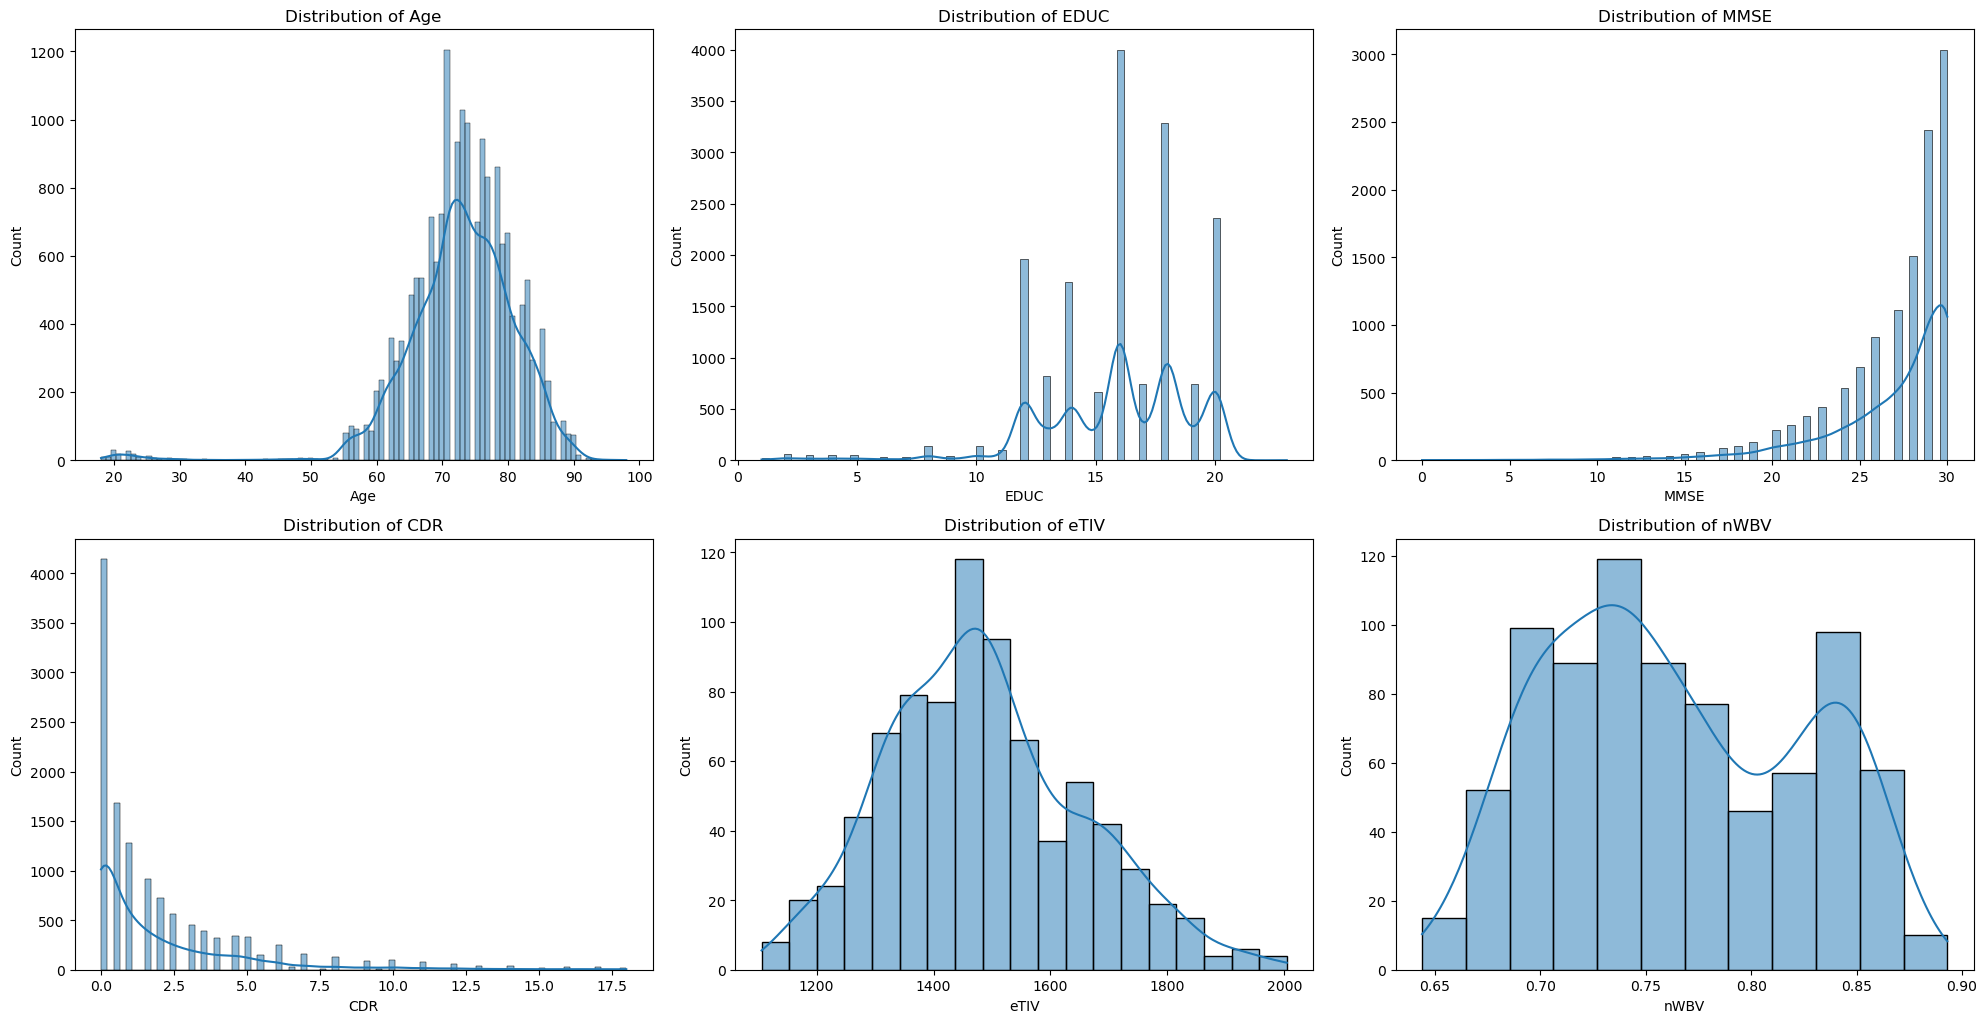

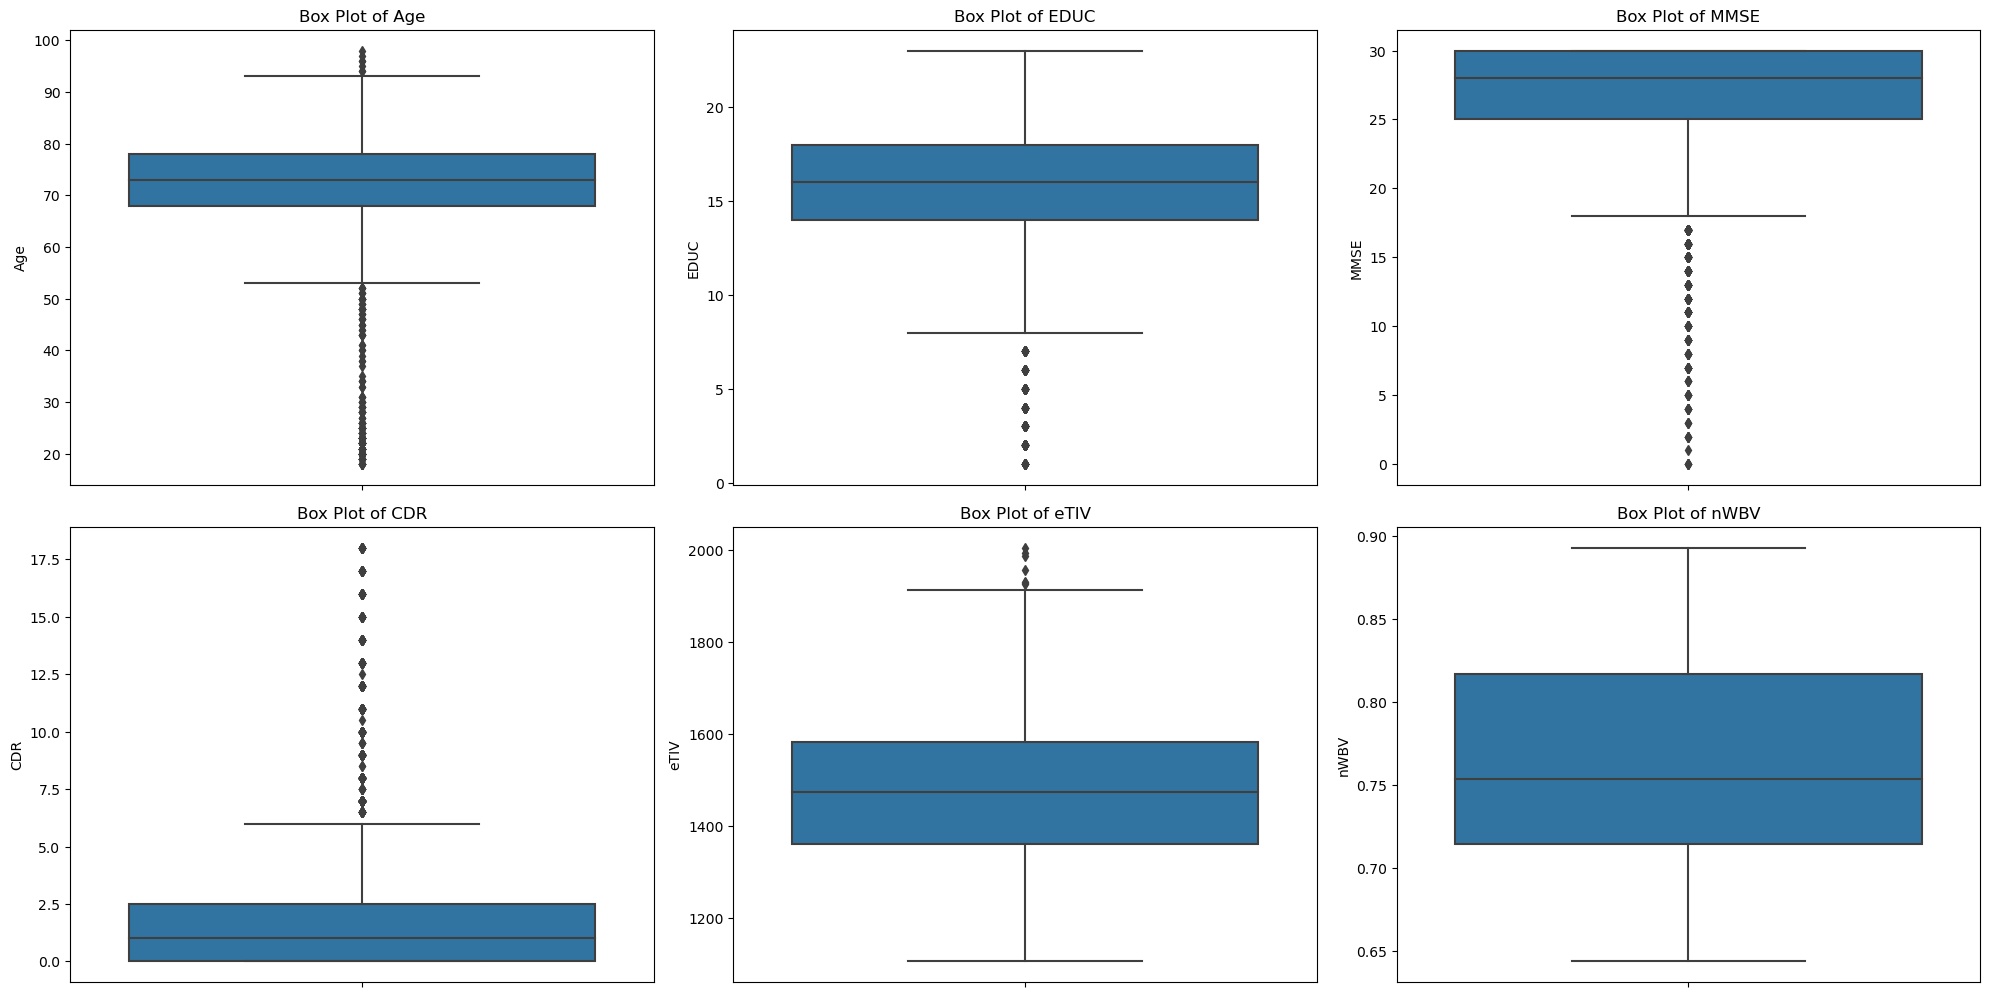

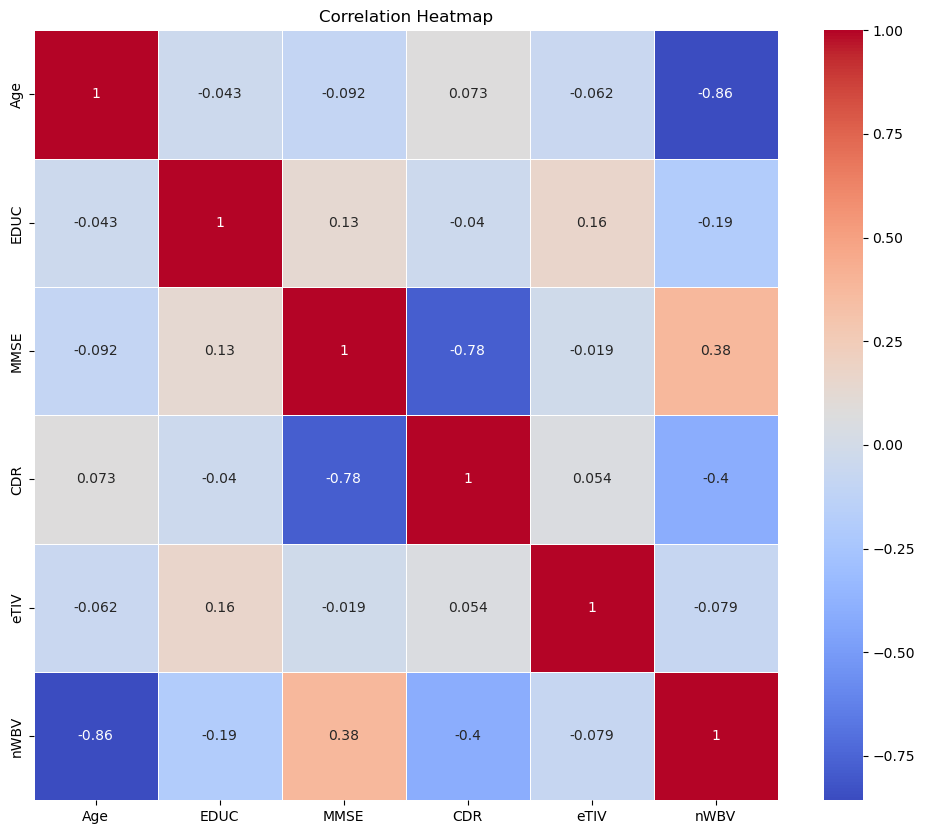

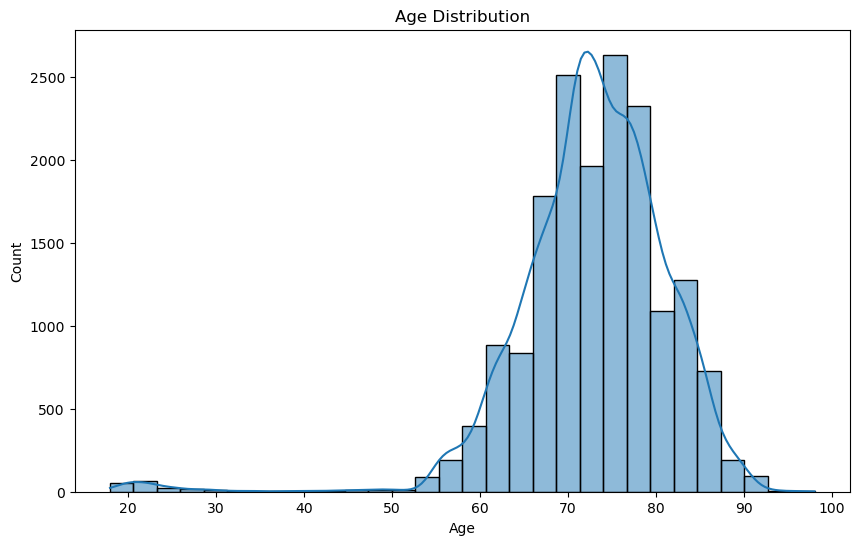

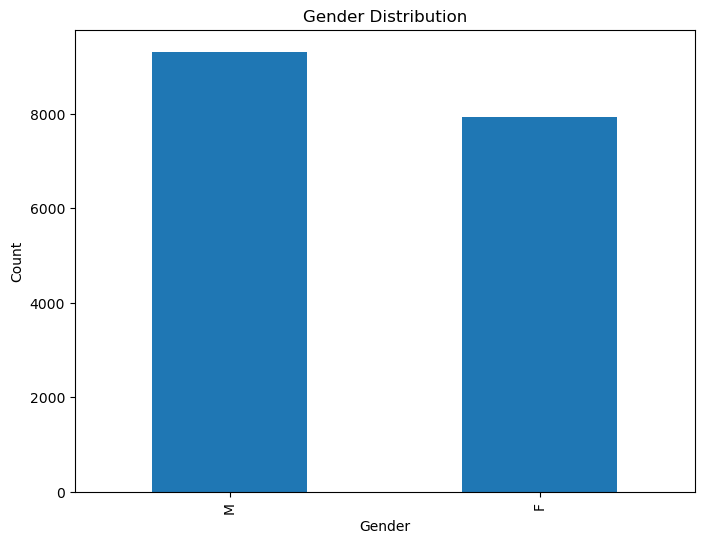

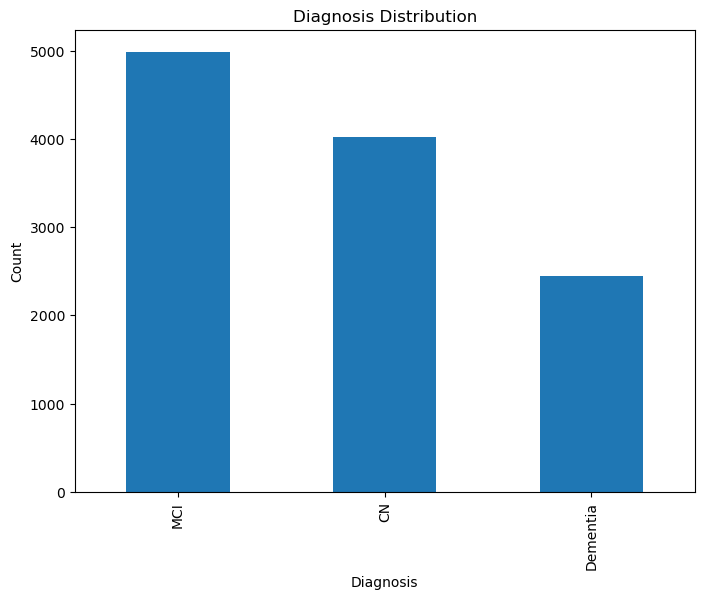

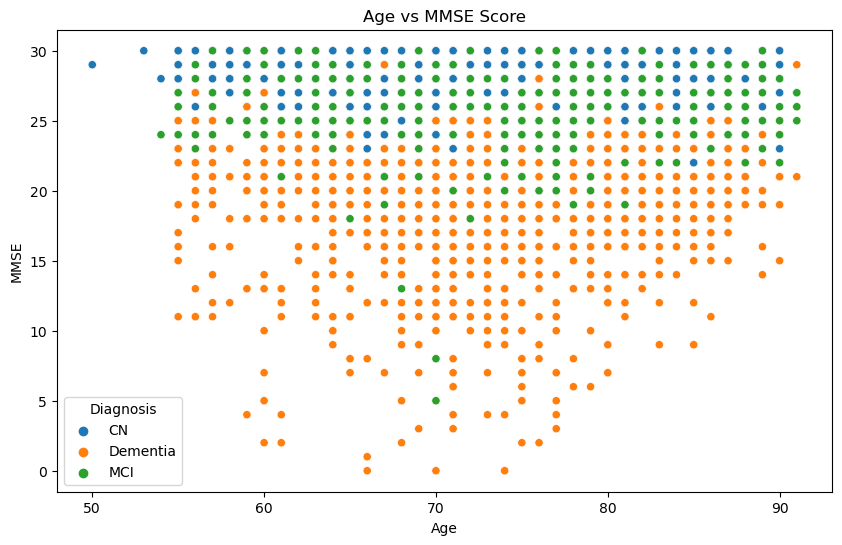

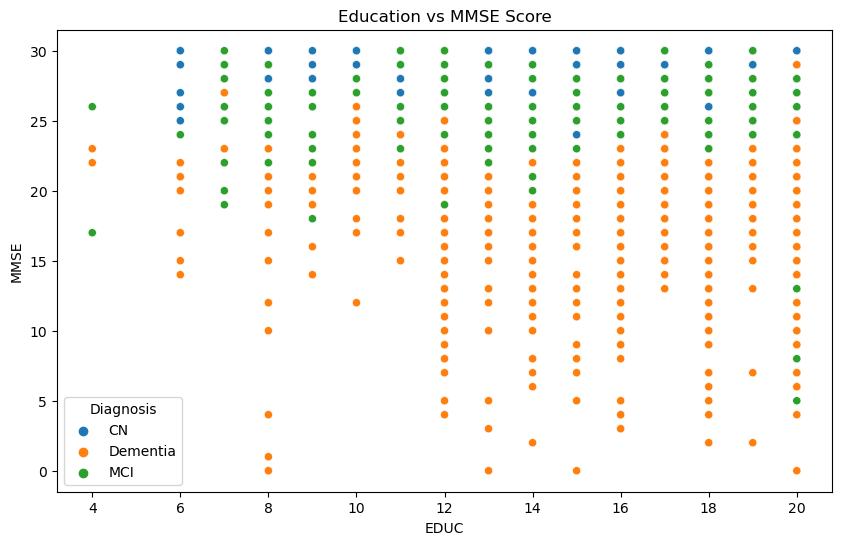

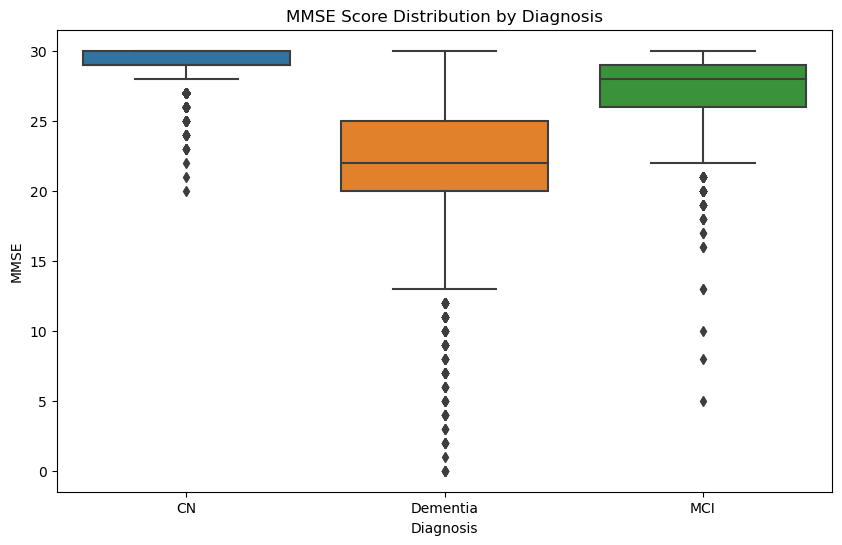

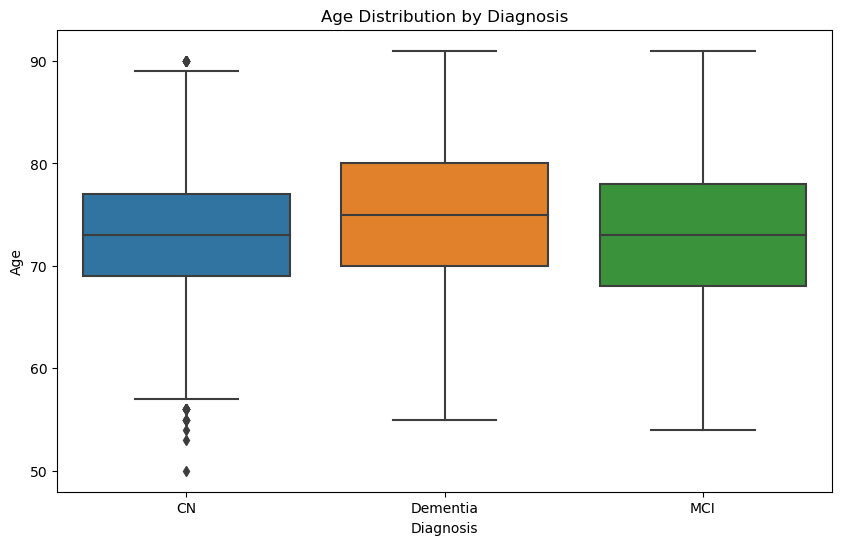

C:\Users\25830651\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


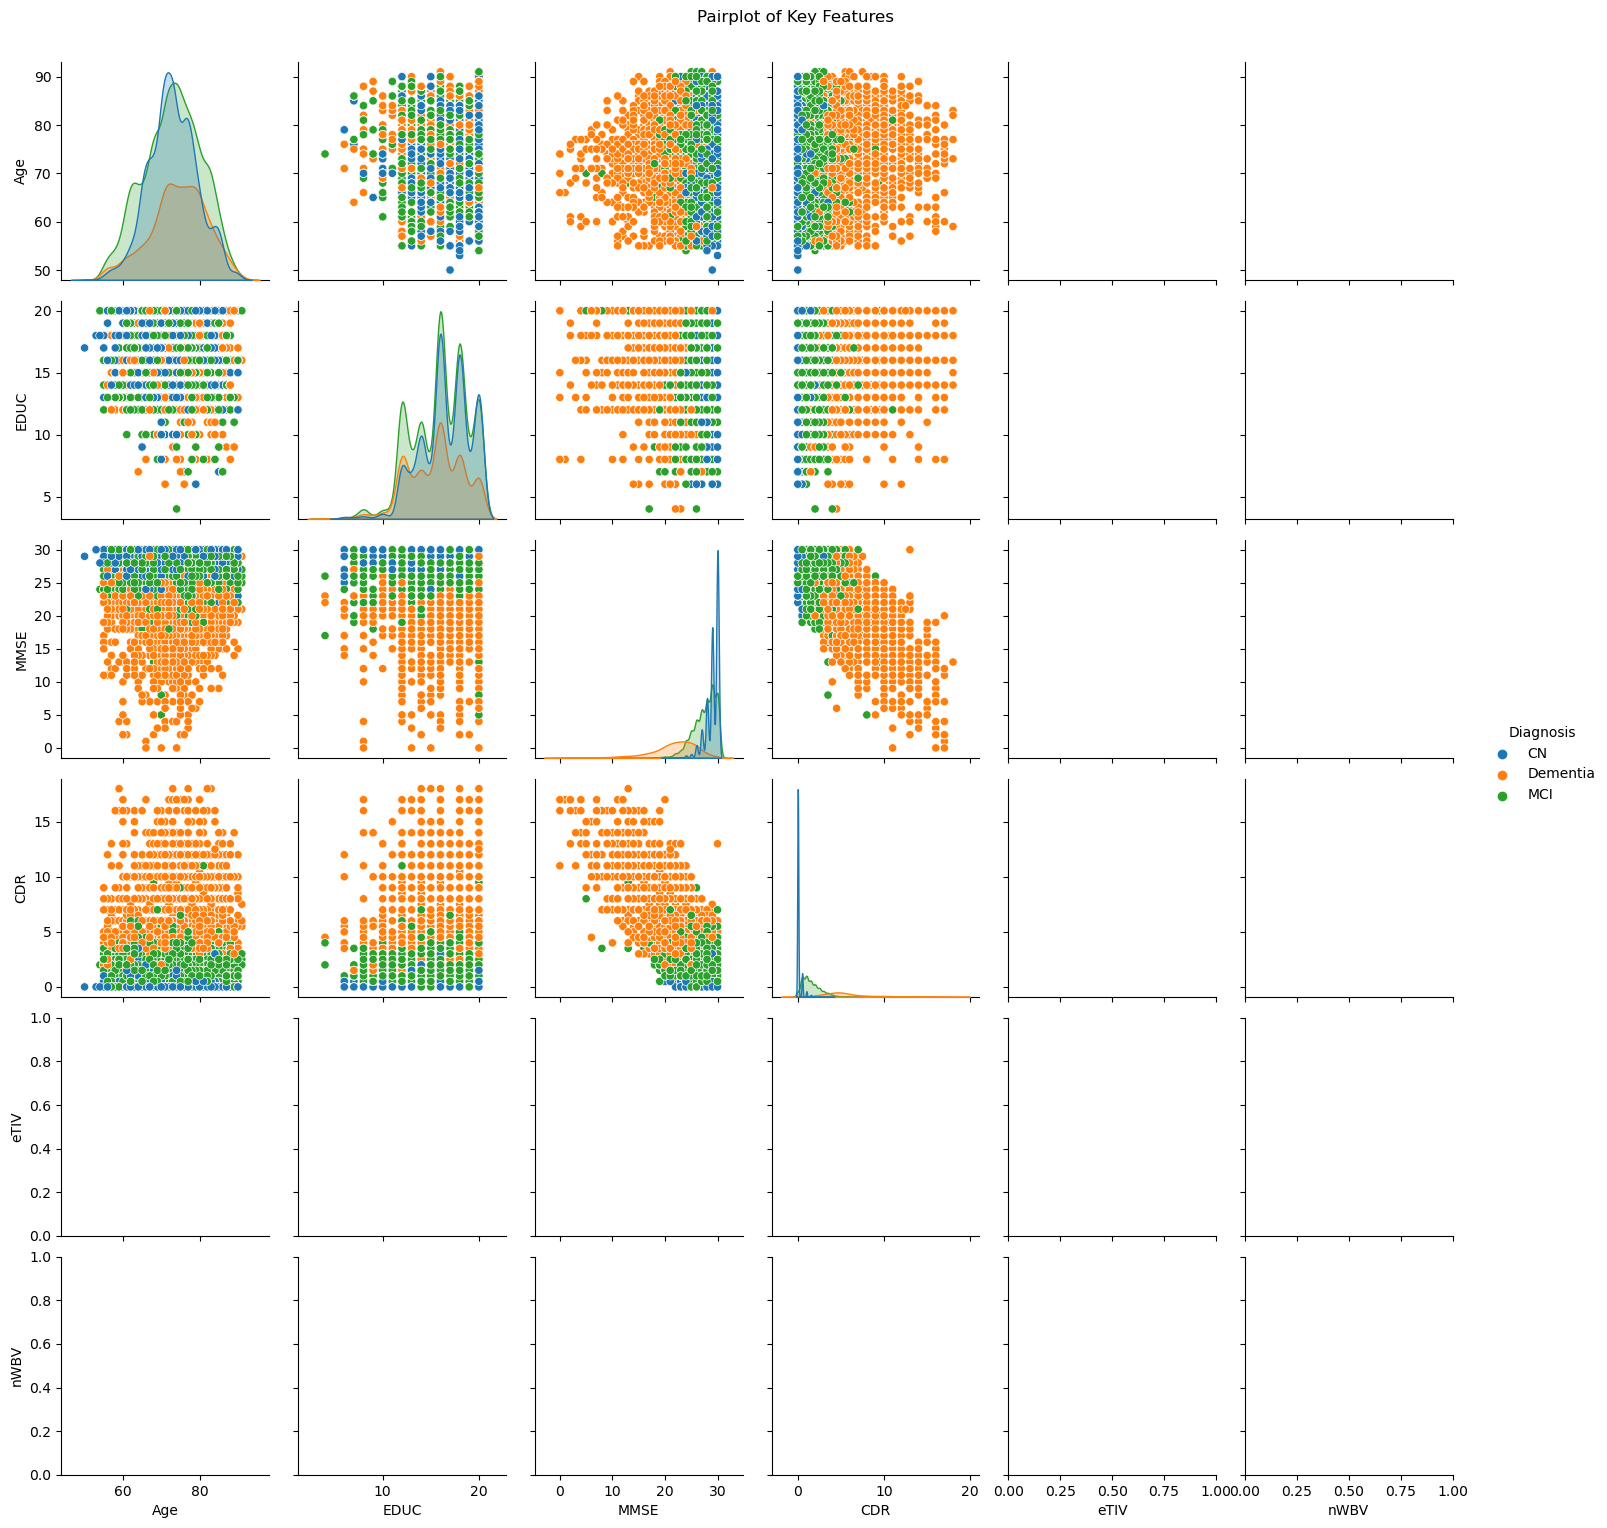


5. Statistical Tests:
T-test for Age between Dementia and Non-Dementia groups:
T-statistic: nan, p-value: nan

Chi-square test for Gender and Diagnosis:
Chi2 statistic: 160.599930059904, p-value: 1.3371135518460822e-35


In [3]:
# Exploratory Data Analysis Before Preprocessing

def perform_eda(data):
    print("Exploratory Data Analysis")
    print("========================")

    # Basic information about the dataset
    print("\n1. Dataset Information:")
    print(data.info())

    # Summary statistics
    print("\n2. Summary Statistics:")
    print(data.describe())

    # Missing values
    print("\n3. Missing Values:")
    missing_values = data.isnull().sum()
    print(missing_values[missing_values > 0])

    # Unique values in categorical columns
    print("\n4. Unique Values in Categorical Columns:")
    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"{col}: {data[col].nunique()} unique values")
        print(data[col].value_counts())
        print()

    # Distribution of numerical features
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Box plots for numerical features
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=data[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Age'], kde=True, bins=30)
    plt.title('Age Distribution')
    plt.show()

    # Gender distribution
    plt.figure(figsize=(8, 6))
    data['Gender'].value_counts().plot(kind='bar')
    plt.title('Gender Distribution')
    plt.ylabel('Count')
    plt.show()

    # Diagnosis distribution
    plt.figure(figsize=(8, 6))
    data['Diagnosis'].value_counts().plot(kind='bar')
    plt.title('Diagnosis Distribution')
    plt.ylabel('Count')
    plt.show()

    # Age vs MMSE scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=data)
    plt.title('Age vs MMSE Score')
    plt.show()

    # Education vs MMSE scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='EDUC', y='MMSE', hue='Diagnosis', data=data)
    plt.title('Education vs MMSE Score')
    plt.show()

    # MMSE distribution by Diagnosis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diagnosis', y='MMSE', data=data)
    plt.title('MMSE Score Distribution by Diagnosis')
    plt.show()

    # Age distribution by Diagnosis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diagnosis', y='Age', data=data)
    plt.title('Age Distribution by Diagnosis')
    plt.show()

    # Pairplot for key features
    sns.pairplot(data[['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'Diagnosis']], hue='Diagnosis')
    plt.suptitle('Pairplot of Key Features', y=1.02)
    plt.show()

    # Statistical tests
    print("\n5. Statistical Tests:")
    # T-test for Age between Dementia and Non-Dementia groups
    dementia = data[data['Diagnosis'] == 1]['Age']
    non_dementia = data[data['Diagnosis'] == 0]['Age']
    t_stat, p_value = stats.ttest_ind(dementia, non_dementia)
    print(f"T-test for Age between Dementia and Non-Dementia groups:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}")

    # Chi-square test for Gender and Diagnosis
    gender_diagnosis = pd.crosstab(data['Gender'], data['Diagnosis'])
    chi2, p_value, dof, expected = stats.chi2_contingency(gender_diagnosis)
    print(f"\nChi-square test for Gender and Diagnosis:")
    print(f"Chi2 statistic: {chi2}, p-value: {p_value}")

# Call the EDA function
perform_eda(merged_data)

In [4]:
# Preprocessing
# handle missing values
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = merged_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'ID']

num_imputer = SimpleImputer(strategy='mean')
merged_data[numeric_columns] = num_imputer.fit_transform(merged_data[numeric_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
merged_data[categorical_columns] = cat_imputer.fit_transform(merged_data[categorical_columns])

# preprocessing categorical data
le_gender = LabelEncoder()
merged_data['Gender'] = le_gender.fit_transform(merged_data['Gender'])

merged_data['Diagnosis'] = merged_data['Diagnosis'].apply(lambda x: 1 if x == 'Dementia' else 0)

# Feature Engineering
# feature scaling (excluding Age)
scaler = StandardScaler()
scaled_features = ['EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV']
merged_data[scaled_features] = scaler.fit_transform(merged_data[scaled_features])

# ensure Age is numeric
merged_data['Age'] = pd.to_numeric(merged_data['Age'], errors='coerce')


--- Classification Results for Merged Dataset ---

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2948
           1       0.88      0.77      0.82       498

    accuracy                           0.95      3446
   macro avg       0.92      0.88      0.90      3446
weighted avg       0.95      0.95      0.95      3446



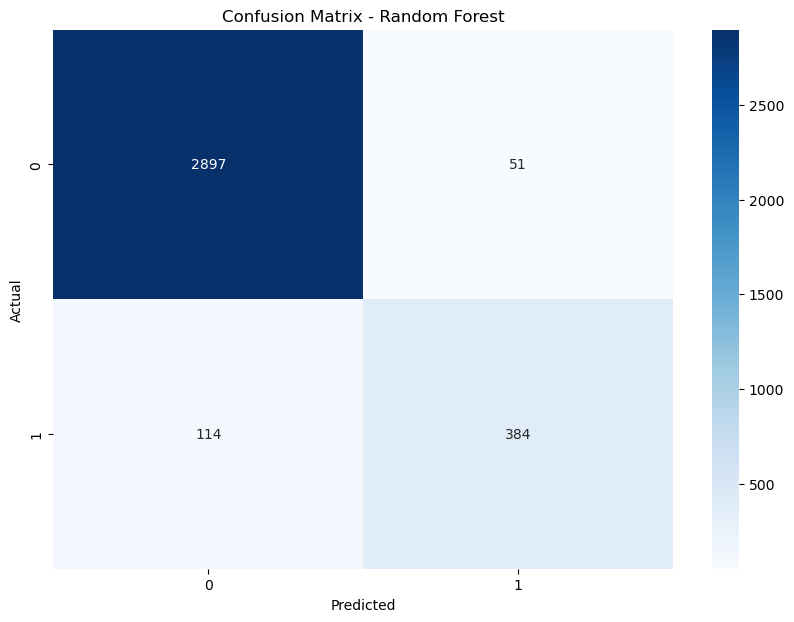


Training SVM...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2948
           1       0.89      0.54      0.67       498

    accuracy                           0.92      3446
   macro avg       0.91      0.76      0.81      3446
weighted avg       0.92      0.92      0.92      3446



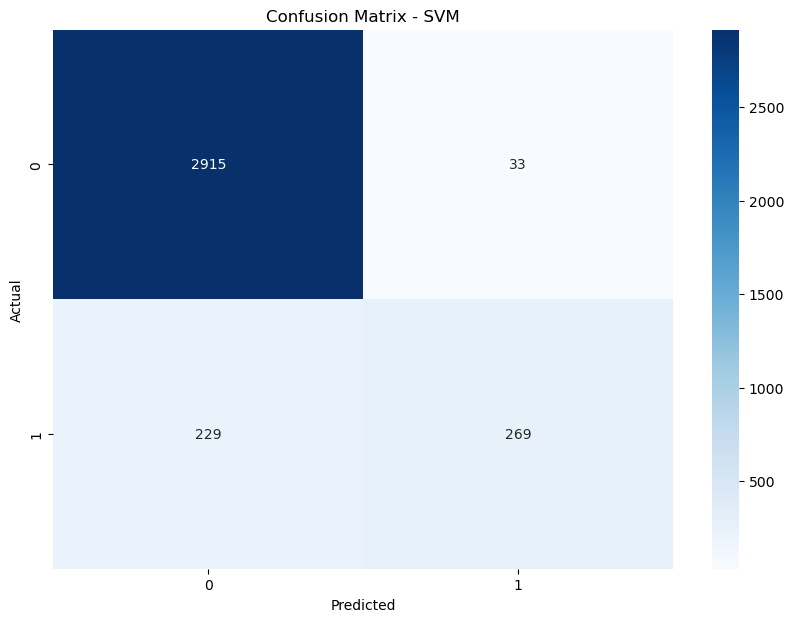


Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2948
           1       0.85      0.67      0.75       498

    accuracy                           0.93      3446
   macro avg       0.90      0.82      0.85      3446
weighted avg       0.93      0.93      0.93      3446



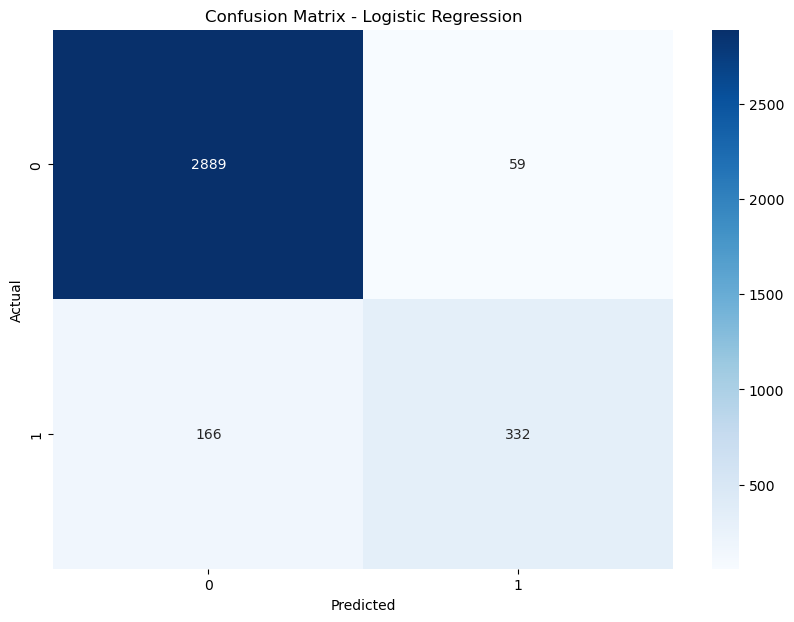


Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2948
           1       0.87      0.78      0.82       498

    accuracy                           0.95      3446
   macro avg       0.92      0.88      0.90      3446
weighted avg       0.95      0.95      0.95      3446



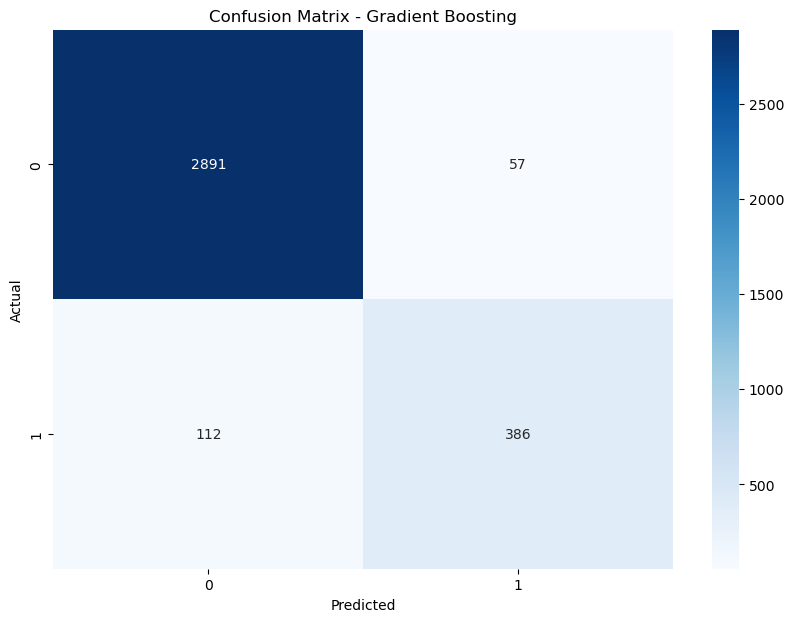


Training Naive Bayes...
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11      2948
           1       0.15      1.00      0.26       498

    accuracy                           0.19      3446
   macro avg       0.58      0.53      0.18      3446
weighted avg       0.88      0.19      0.13      3446



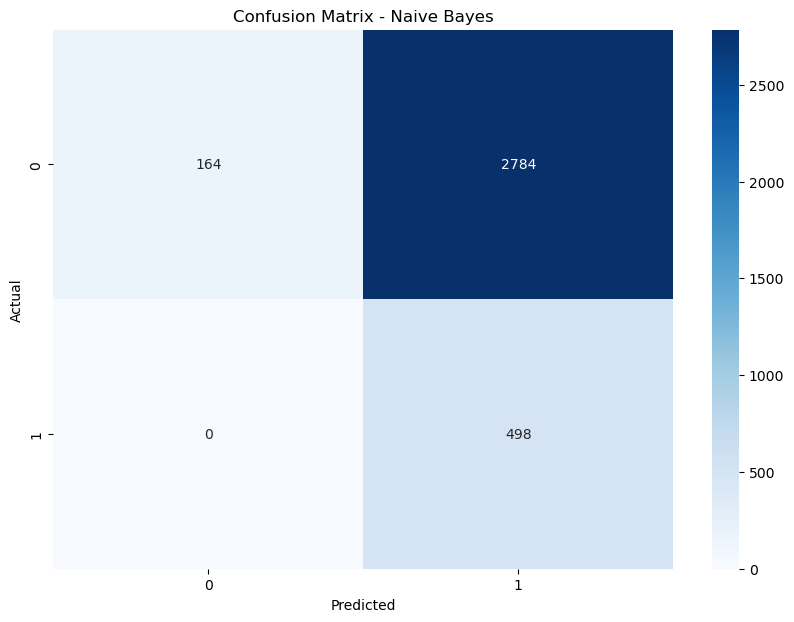


Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2948
           1       0.81      0.73      0.77       498

    accuracy                           0.94      3446
   macro avg       0.88      0.85      0.86      3446
weighted avg       0.93      0.94      0.93      3446



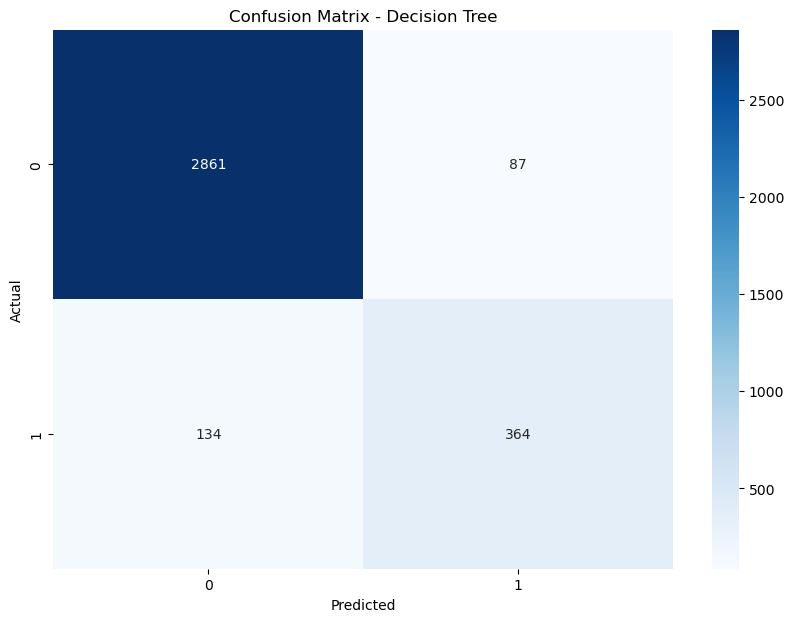


Training MLP...
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2948
           1       0.89      0.72      0.80       498

    accuracy                           0.95      3446
   macro avg       0.92      0.85      0.88      3446
weighted avg       0.95      0.95      0.94      3446



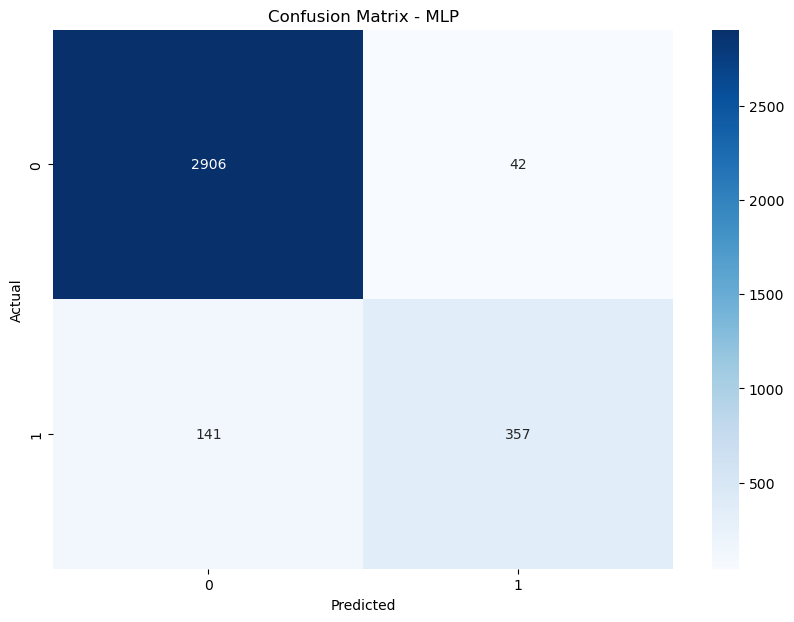

In [16]:
# Function to train and evaluate models
def train_and_evaluate_merged_data(X, y):
    if len(X) == 0 or len(y) == 0:
        print("No data available for classification")
        return
    if len(y.unique()) < 2:
        print("Only one class present. Cannot perform classification.")
        return
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'MLP': MLPClassifier(random_state=42, max_iter=1000)
    }
    
    for name, clf in classifiers.items():
        print(f"\nTraining {name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

# Prepare data for classification
X = merged_data.drop(columns=['ID', 'Diagnosis'])
y = merged_data['Diagnosis']

# Perform classification on the entire merged dataset
print("\n--- Classification Results for Merged Dataset ---")
train_and_evaluate_merged_data(X, y)

In [5]:
# Split data into age groups
group1 = merged_data[merged_data['Age'] < 65]
group2 = merged_data[merged_data['Age'] >= 65]

print(f"Size of group1 (0-64): {len(group1)}")
print(f"Size of group2 (65+): {len(group2)}")

Size of group1 (0-64): 2130
Size of group2 (65+): 15100


Exploratory Data Analysis

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, 1 to 17226
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2130 non-null   object 
 1   Age        2130 non-null   float64
 2   Gender     2130 non-null   int32  
 3   EDUC       2130 non-null   float64
 4   MMSE       2130 non-null   float64
 5   CDR        2130 non-null   float64
 6   eTIV       2130 non-null   float64
 7   nWBV       2130 non-null   float64
 8   Diagnosis  2130 non-null   int64  
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 158.1+ KB
None

2. Summary Statistics:
               Age       Gender         EDUC         MMSE          CDR  \
count  2130.000000  2130.000000  2130.000000  2130.000000  2130.000000   
mean     57.578404     0.426291     0.032729     0.054447     0.005373   
std      10.772977     0.494653     0.974249     0.994180     0.952605   
min     

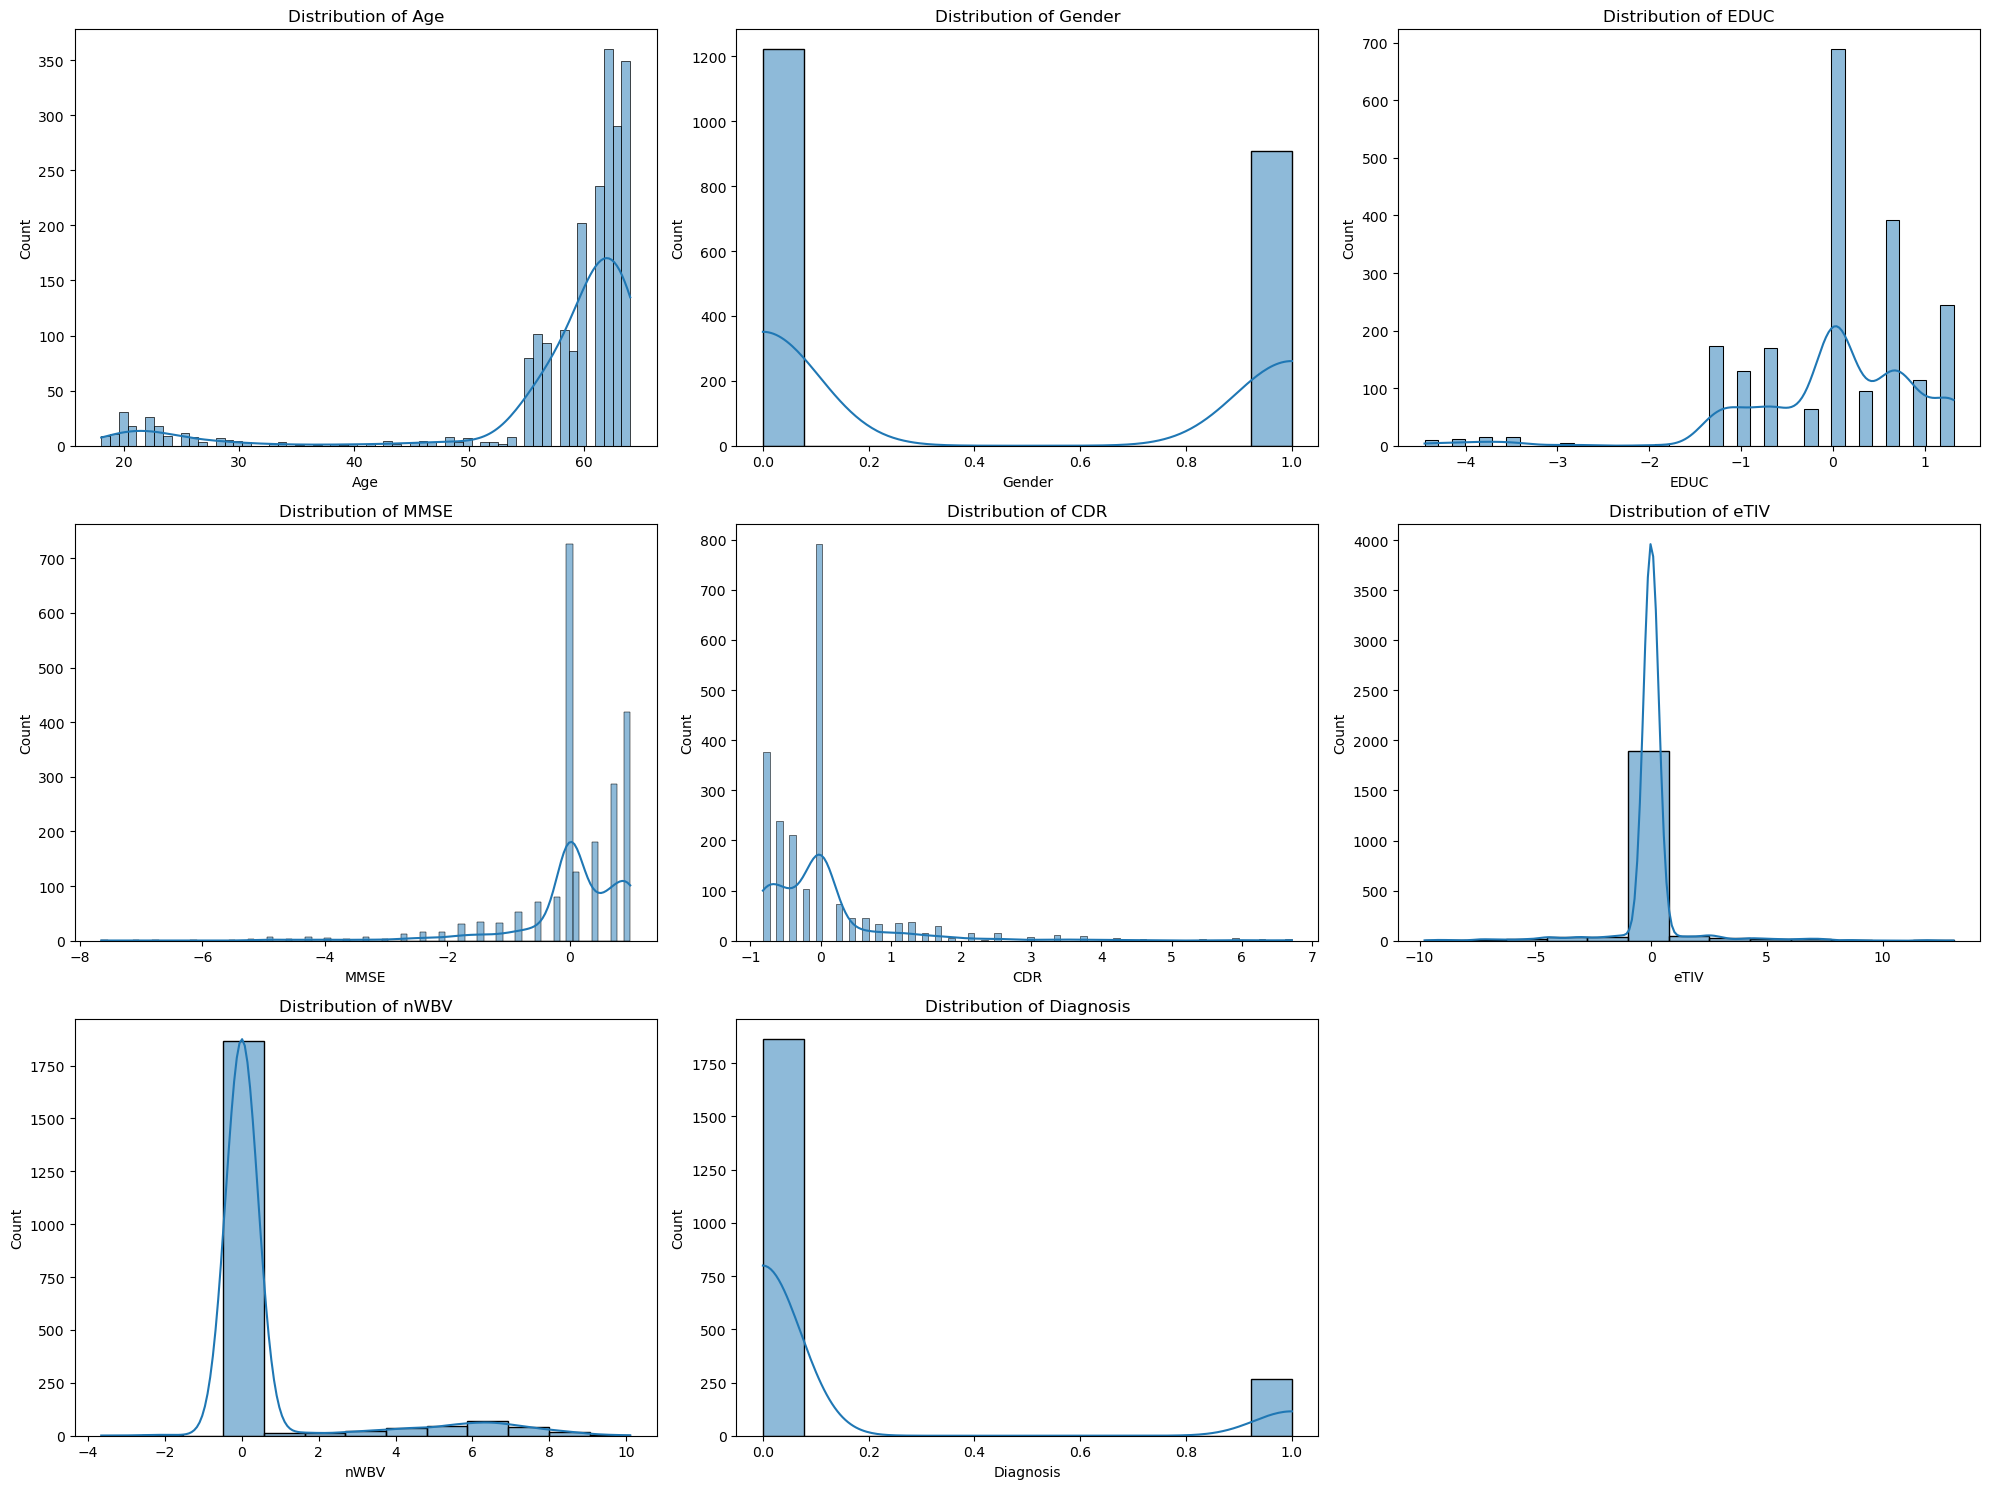

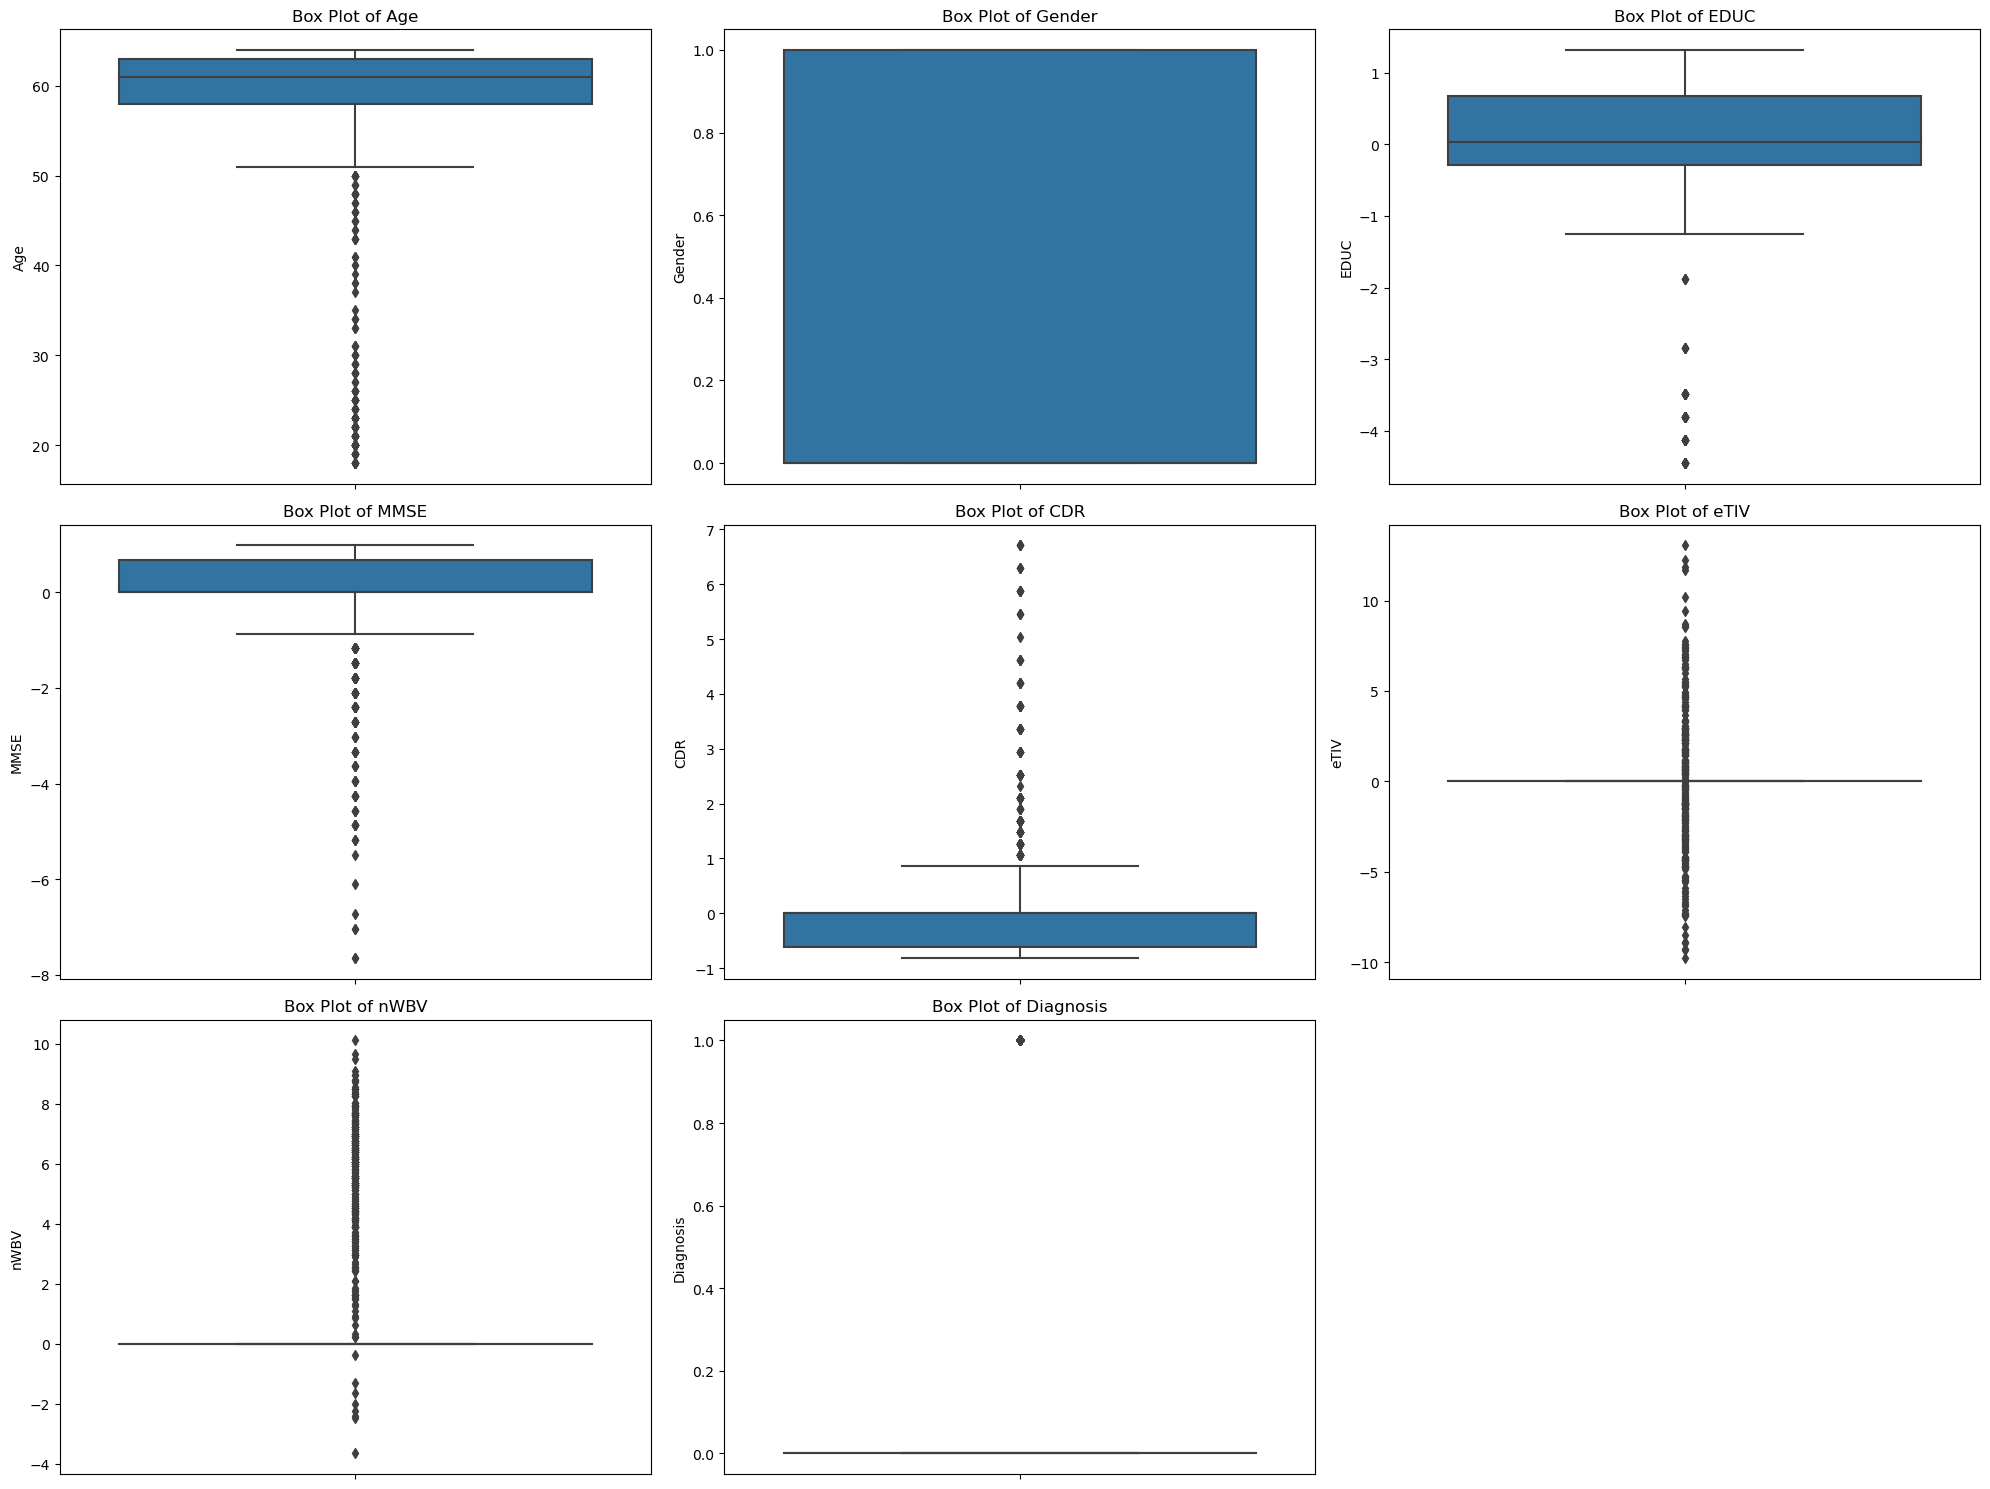

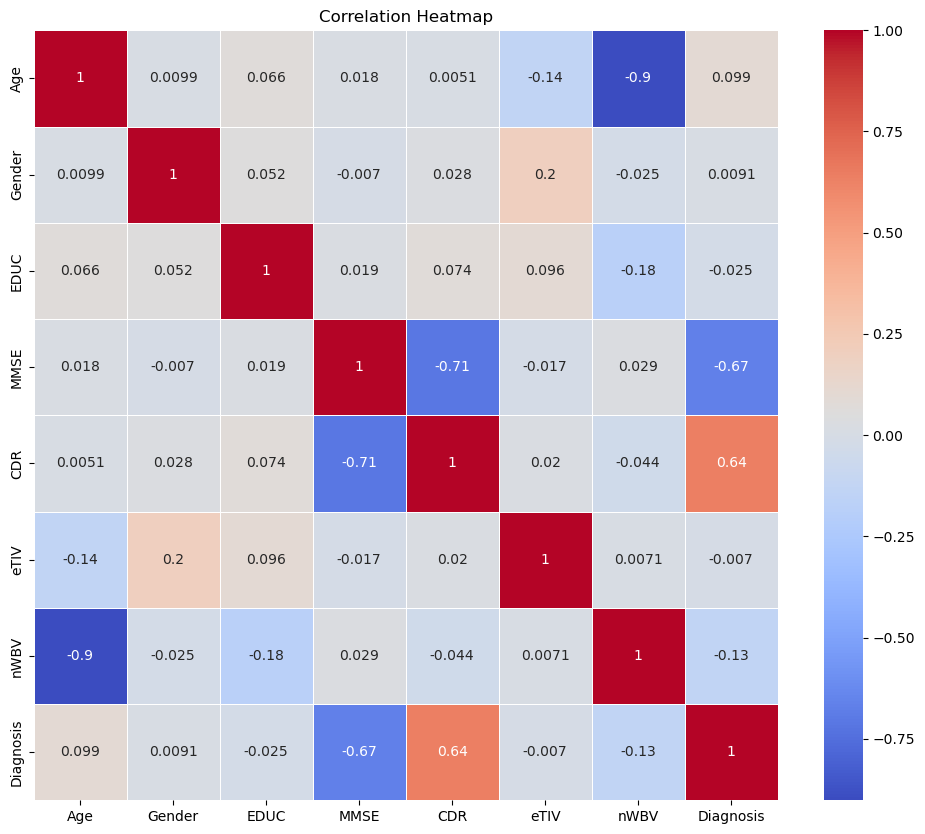

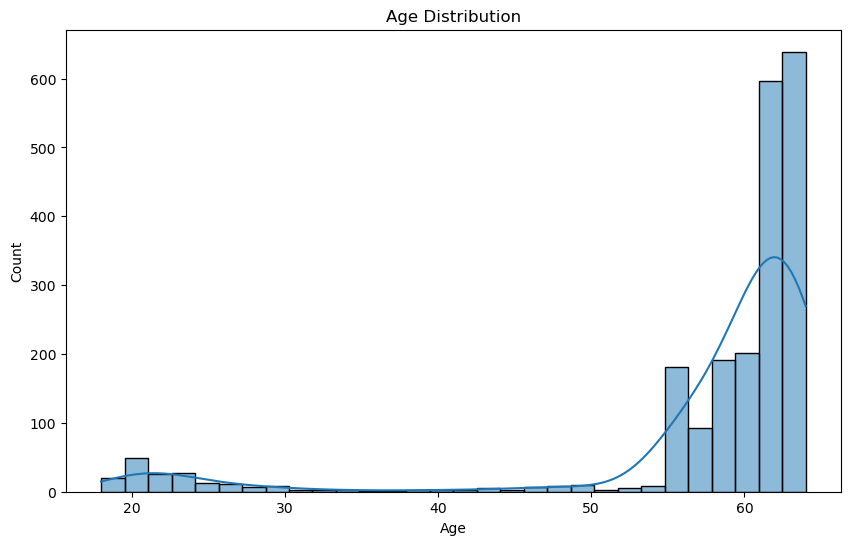

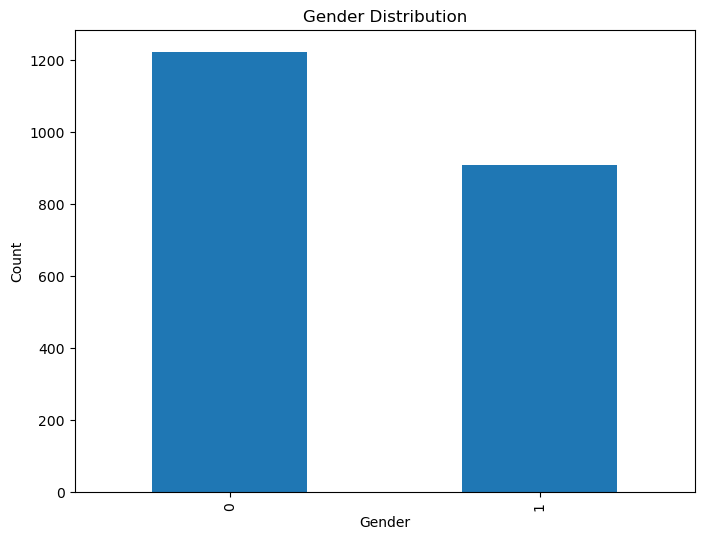

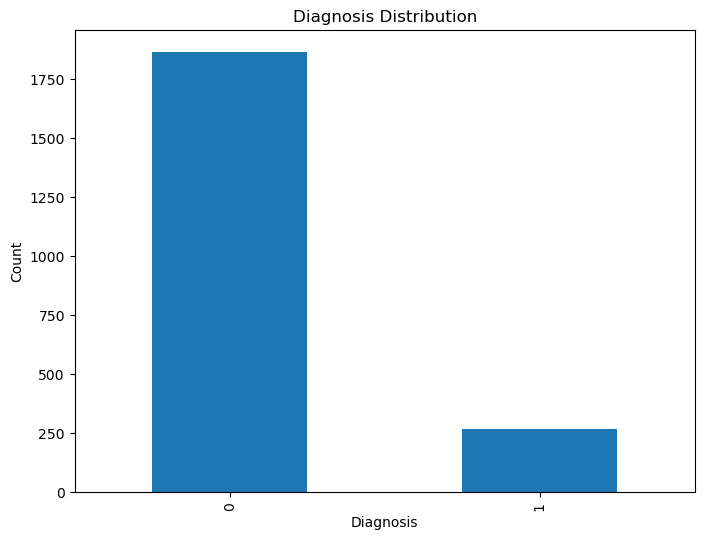

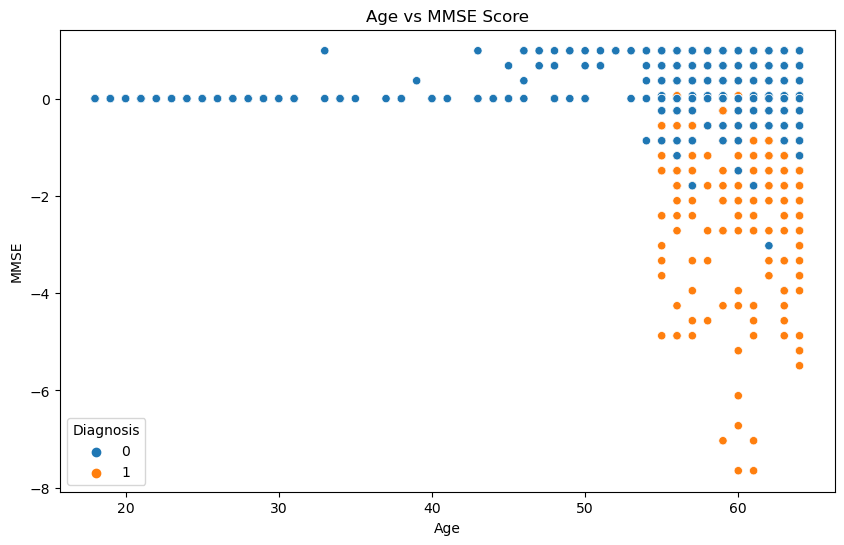

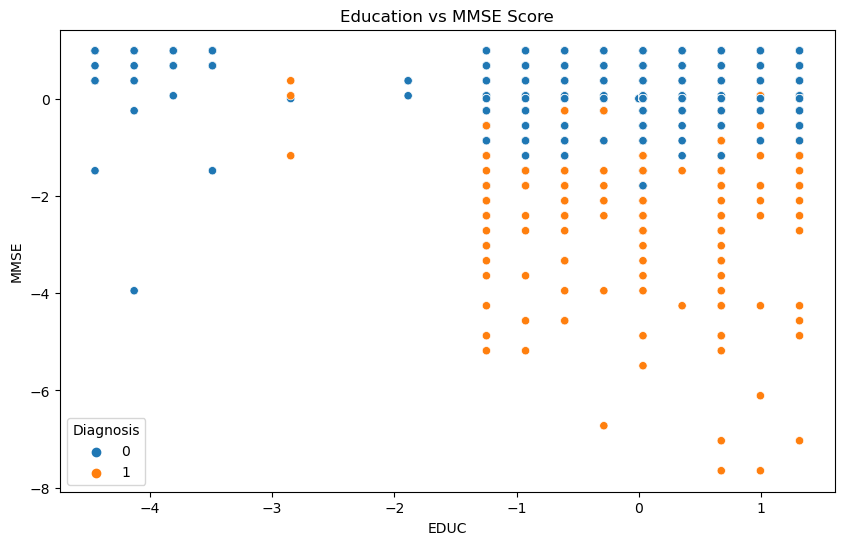

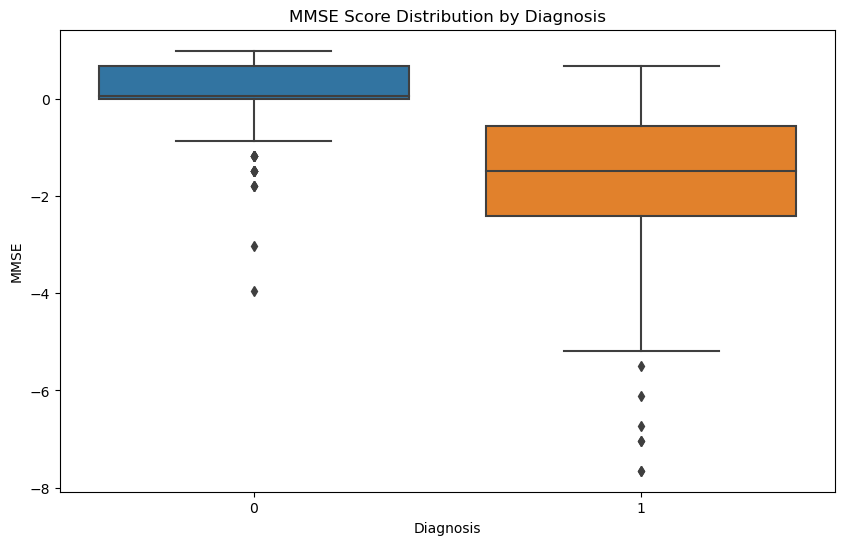

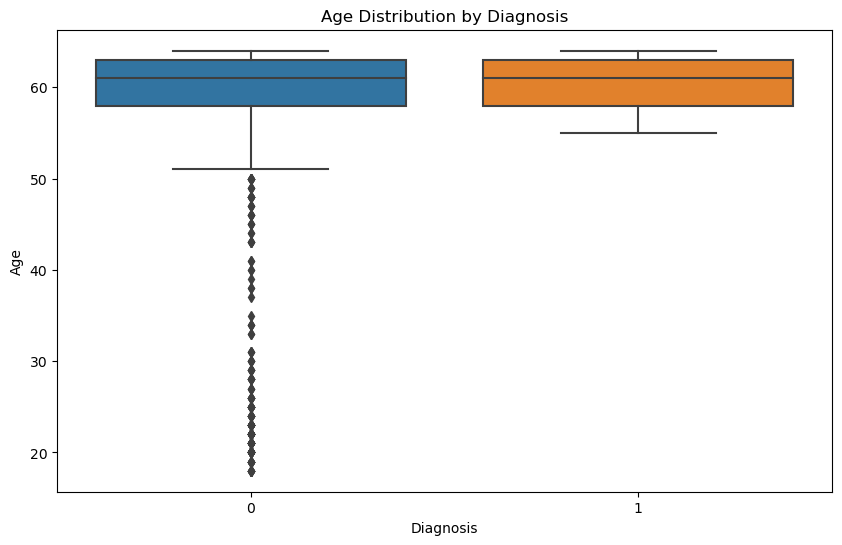

C:\Users\25830651\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


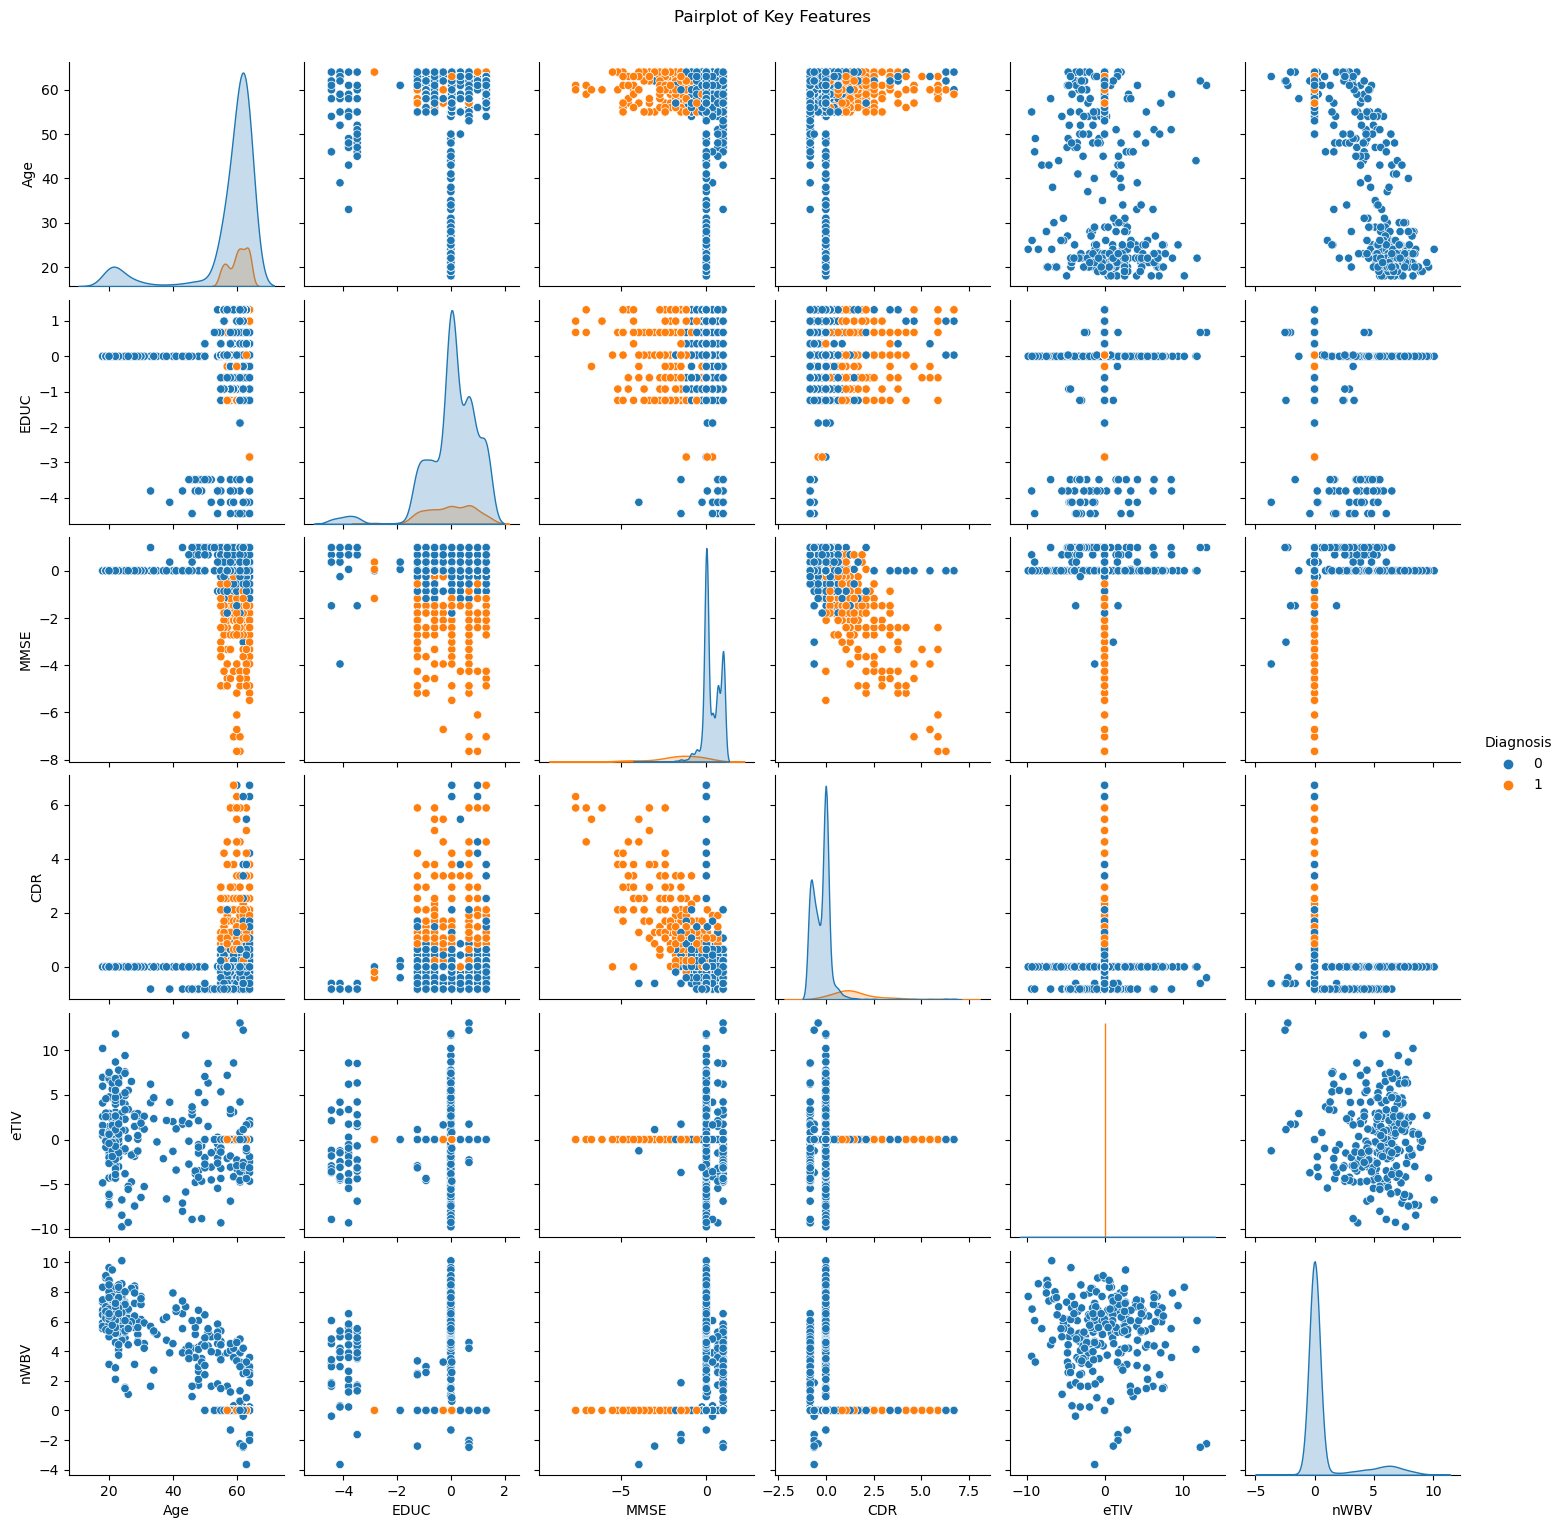


5. Statistical Tests:
T-test for Age between Dementia and Non-Dementia groups:
T-statistic: 4.568138532450478, p-value: 5.202206011229194e-06

Chi-square test for Gender and Diagnosis:
Chi2 statistic: 0.12578200660498623, p-value: 0.7228461259125909


In [11]:
# Exploratory Data Analysis On Age Group 1 (Age Group < 65) After Preprocessing

perform_eda(group1)

Exploratory Data Analysis

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 17229
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15100 non-null  object 
 1   Age        15100 non-null  float64
 2   Gender     15100 non-null  int32  
 3   EDUC       15100 non-null  float64
 4   MMSE       15100 non-null  float64
 5   CDR        15100 non-null  float64
 6   eTIV       15100 non-null  float64
 7   nWBV       15100 non-null  float64
 8   Diagnosis  15100 non-null  int64  
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 1.1+ MB
None

2. Summary Statistics:
                Age        Gender          EDUC          MMSE           CDR  \
count  15100.000000  15100.000000  15100.000000  15100.000000  15100.000000   
mean      74.931595      0.556358     -0.004617     -0.007680     -0.000758   
std        5.816147      0.496830      1.003558      1.000646      1

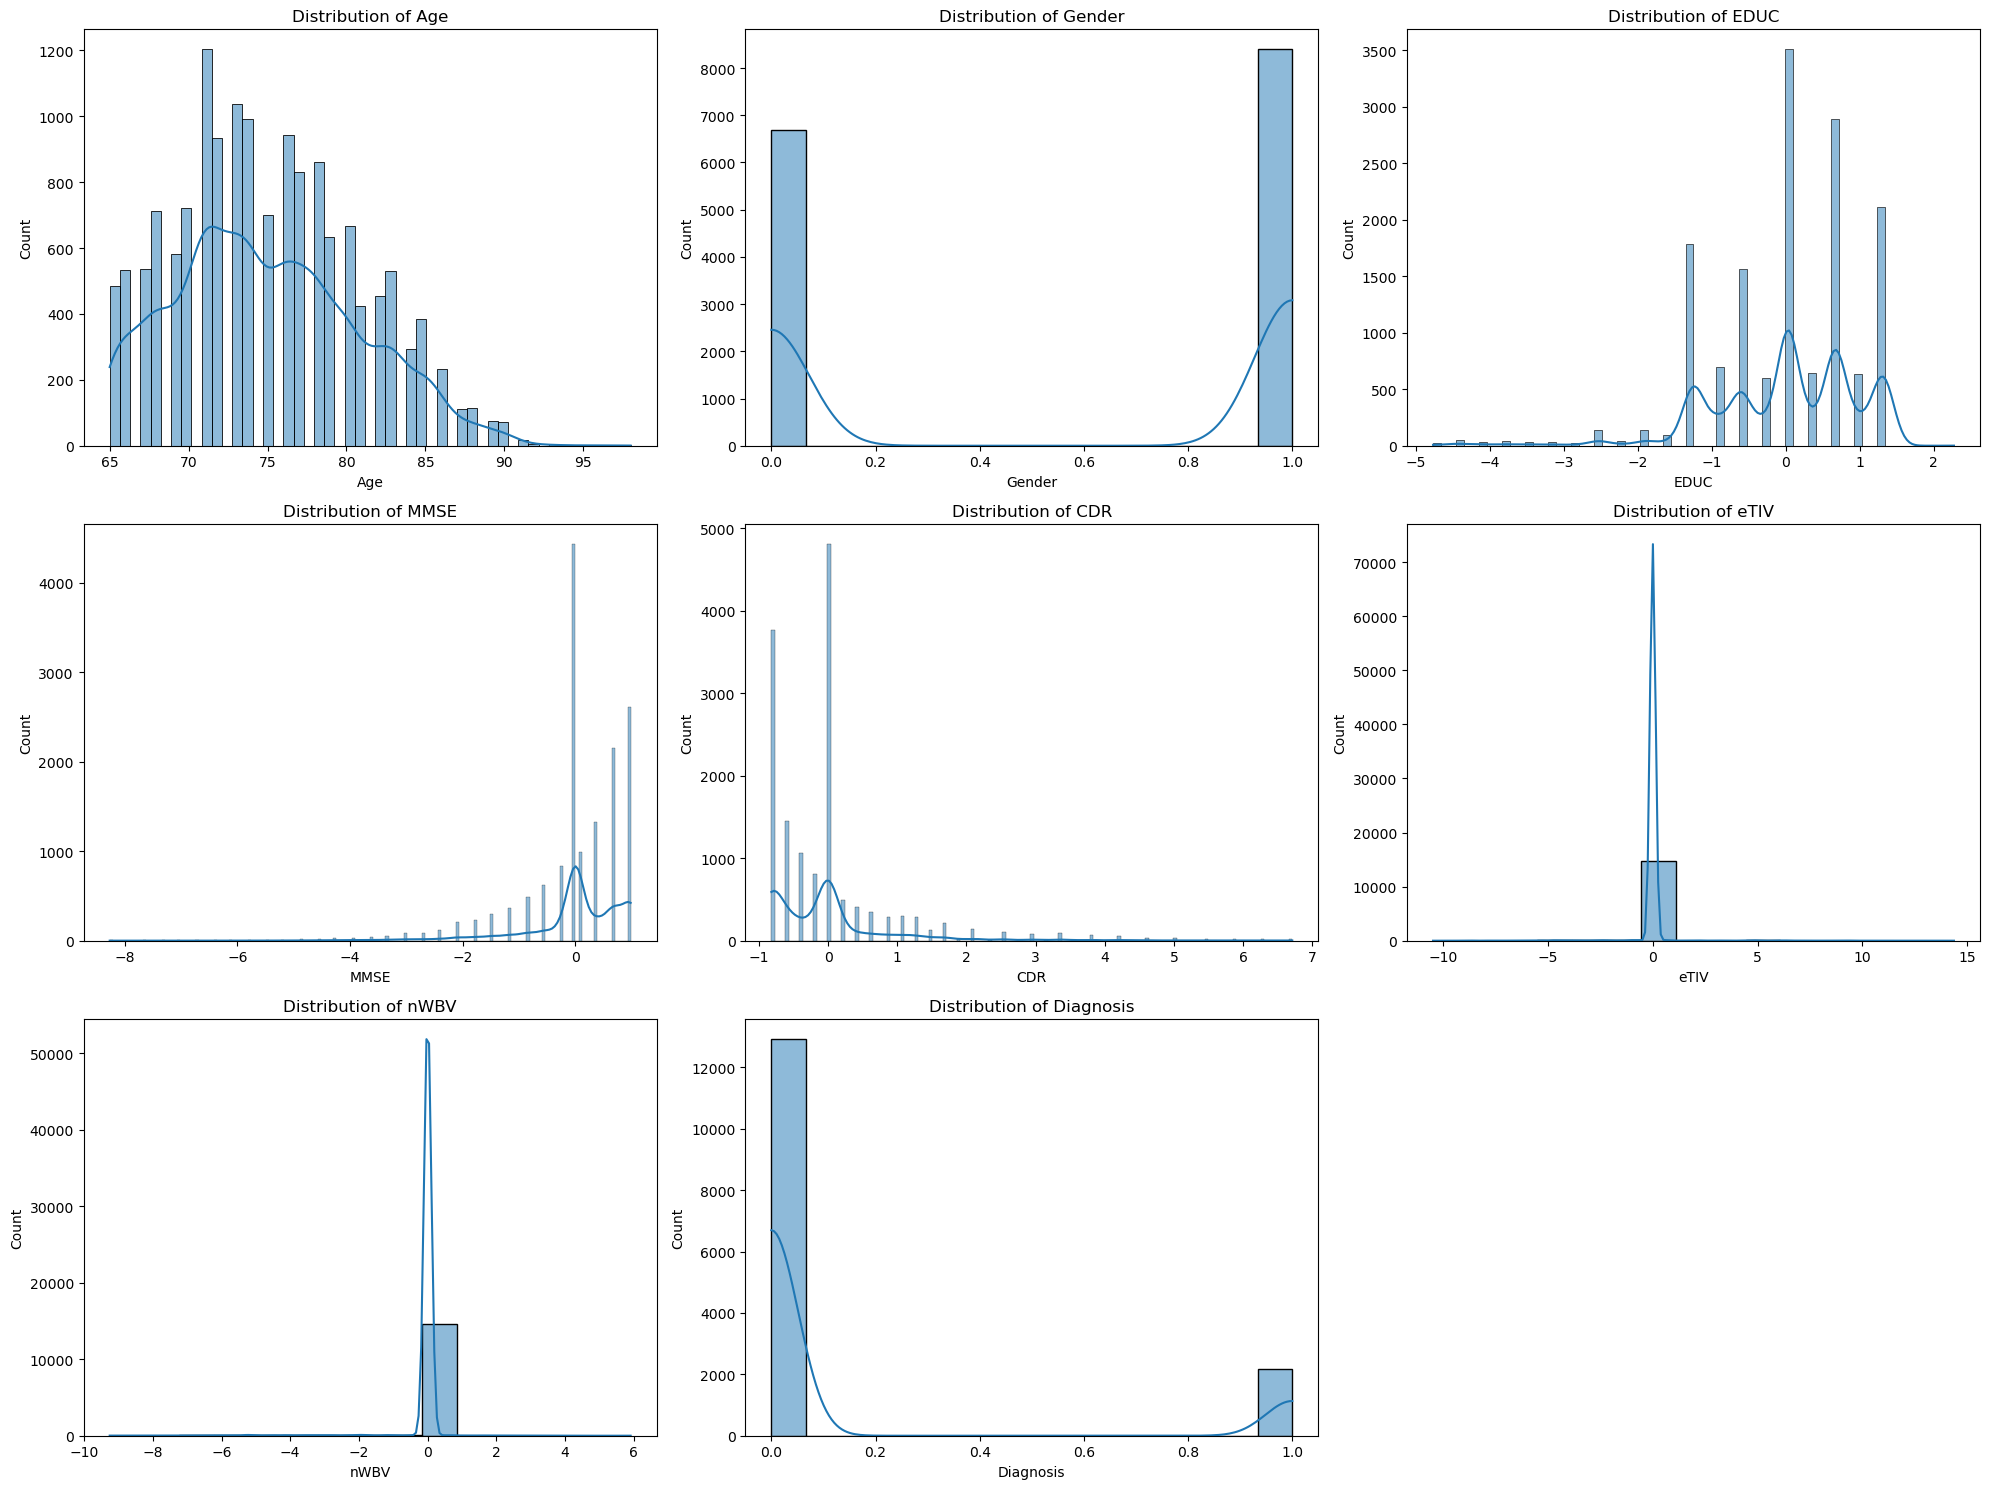

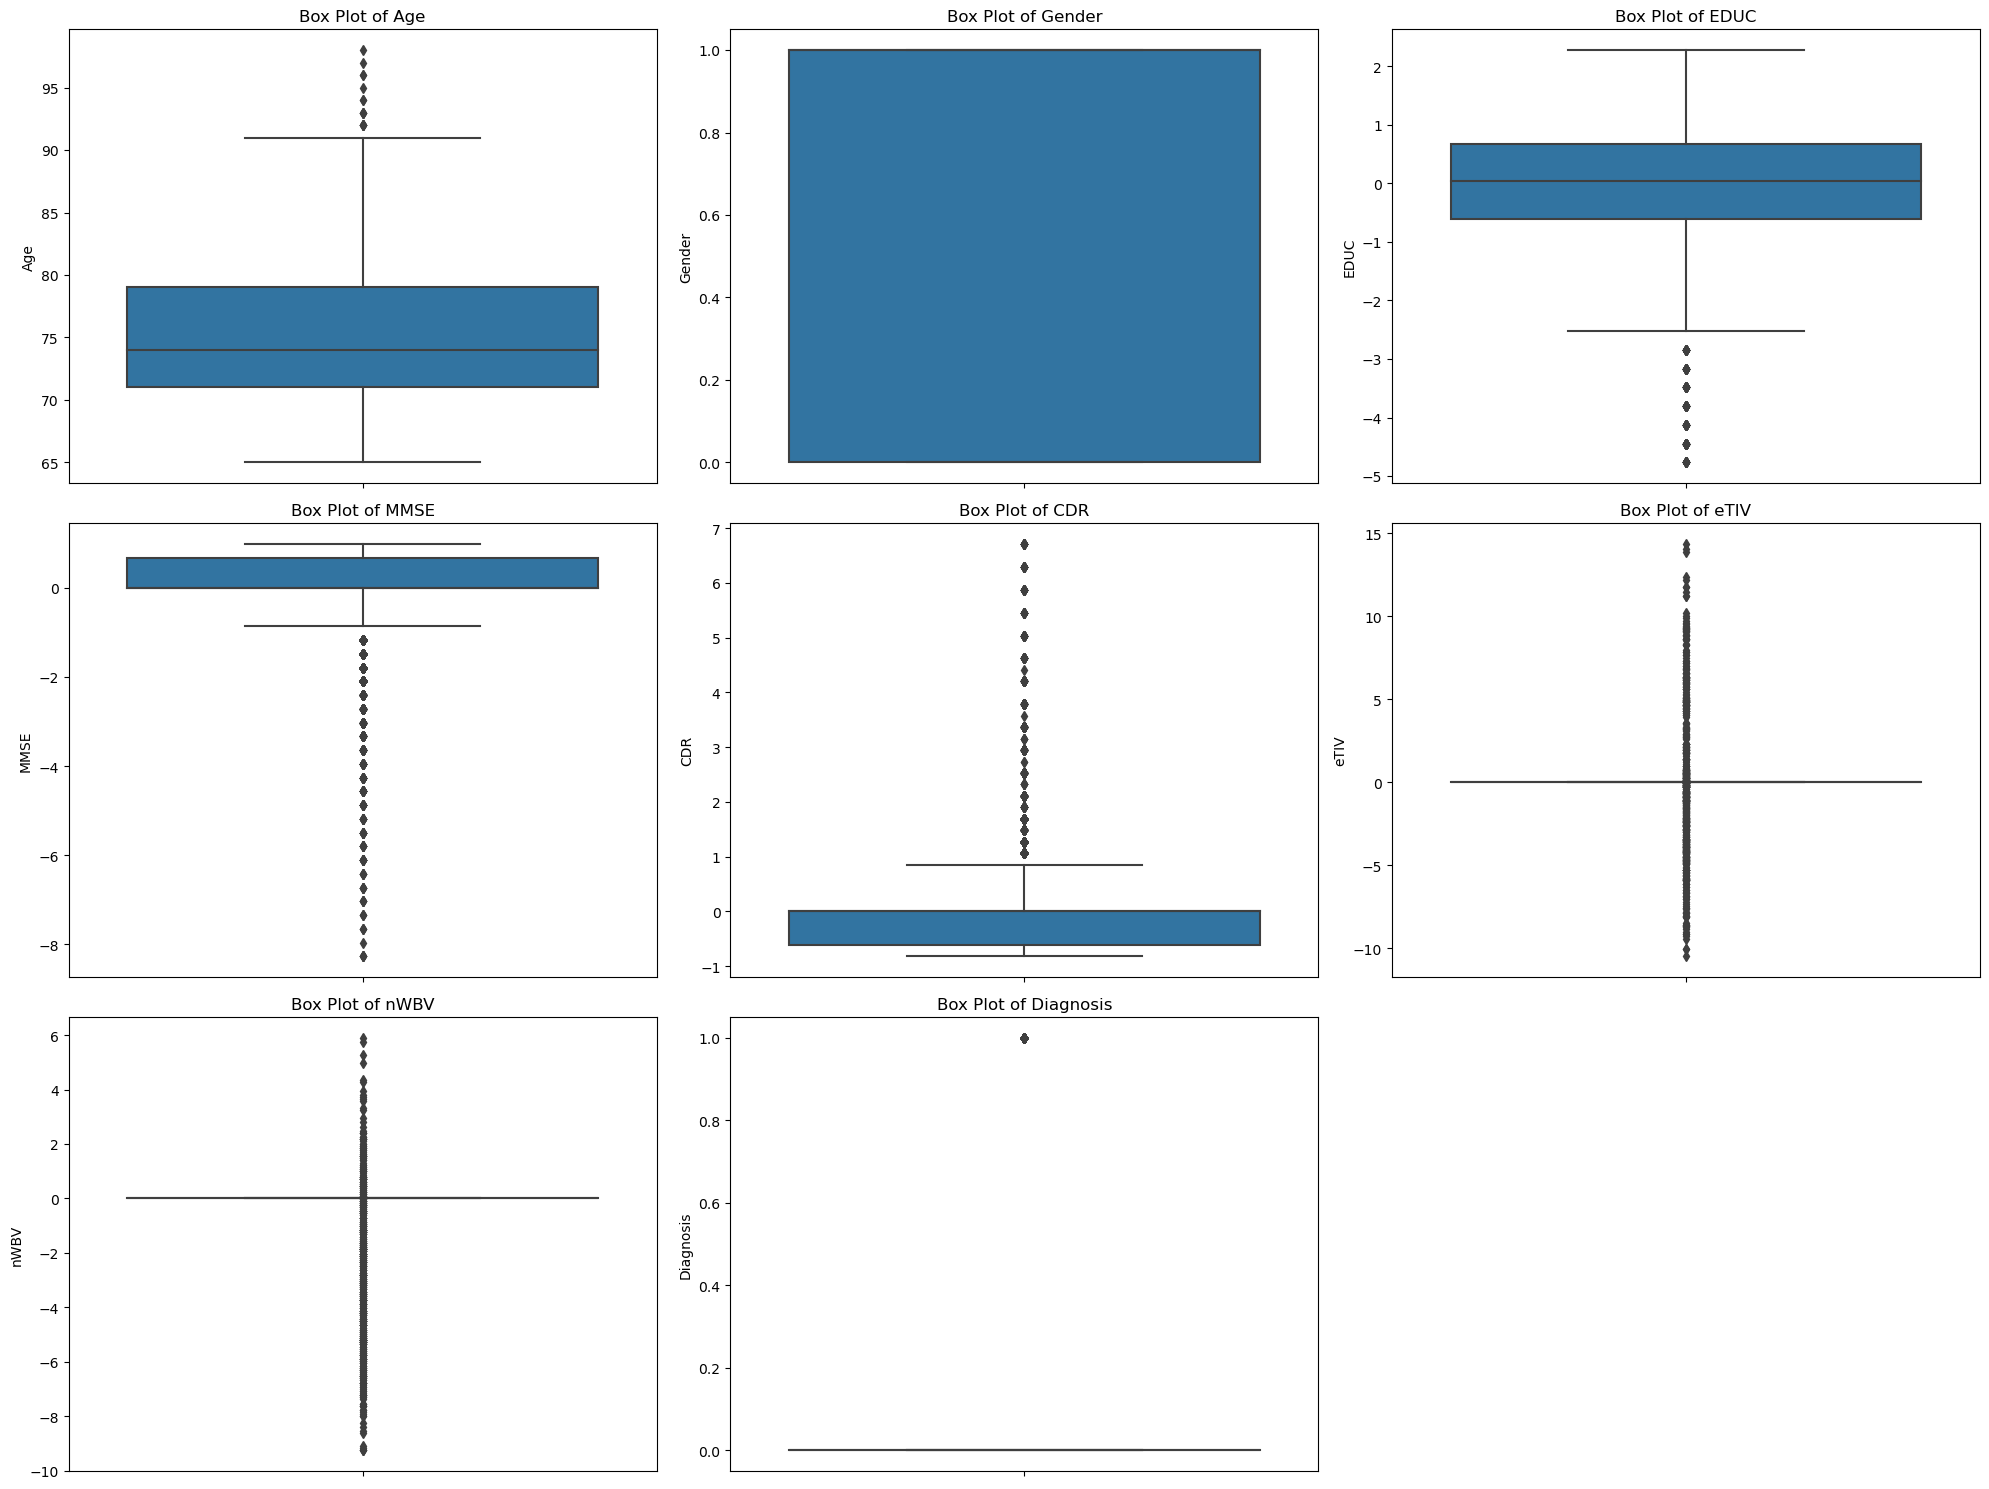

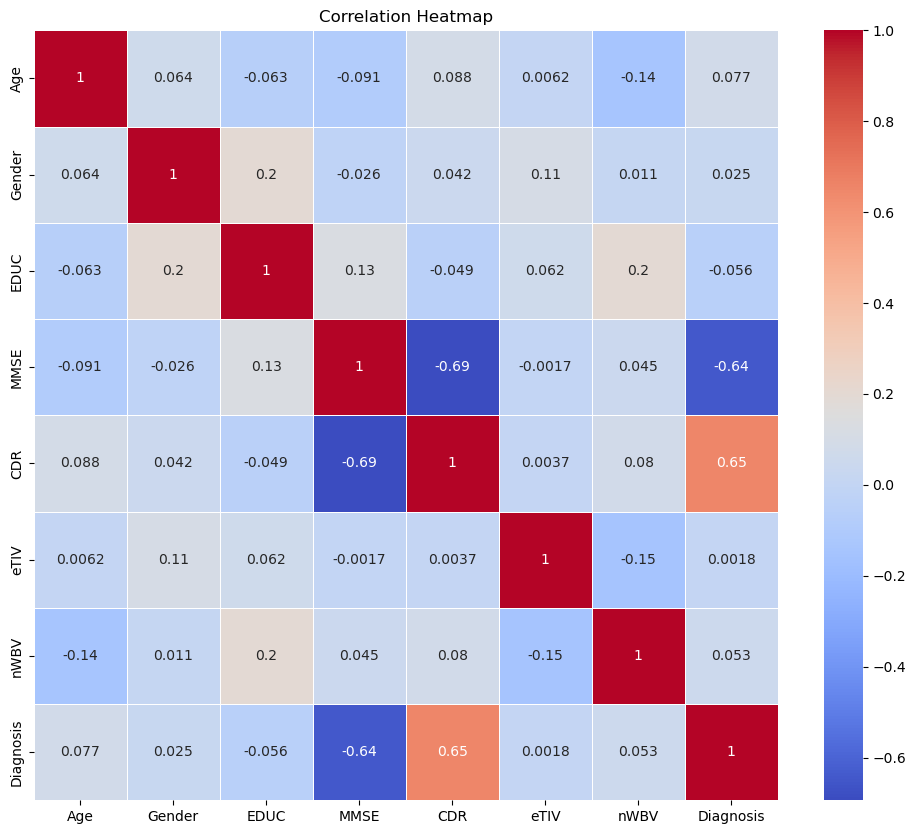

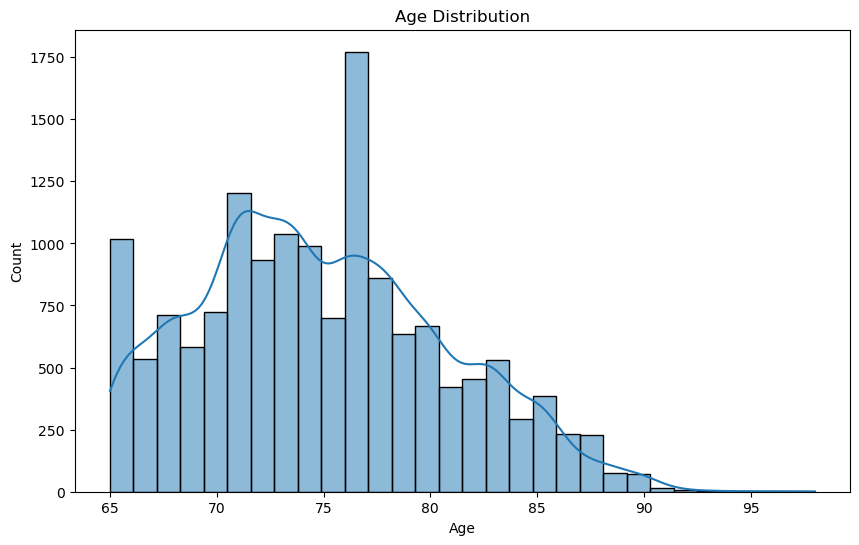

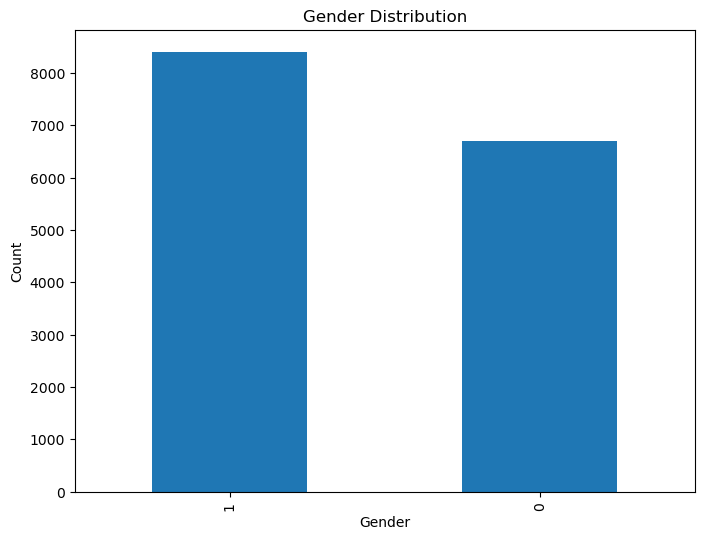

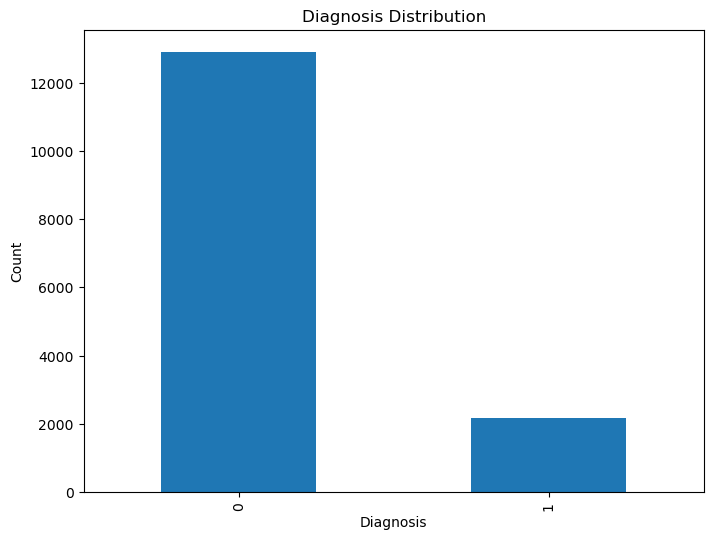

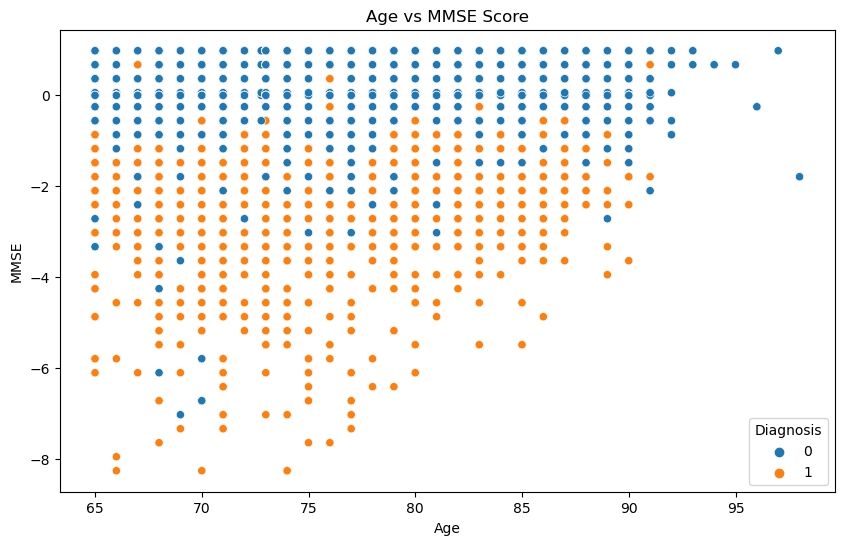

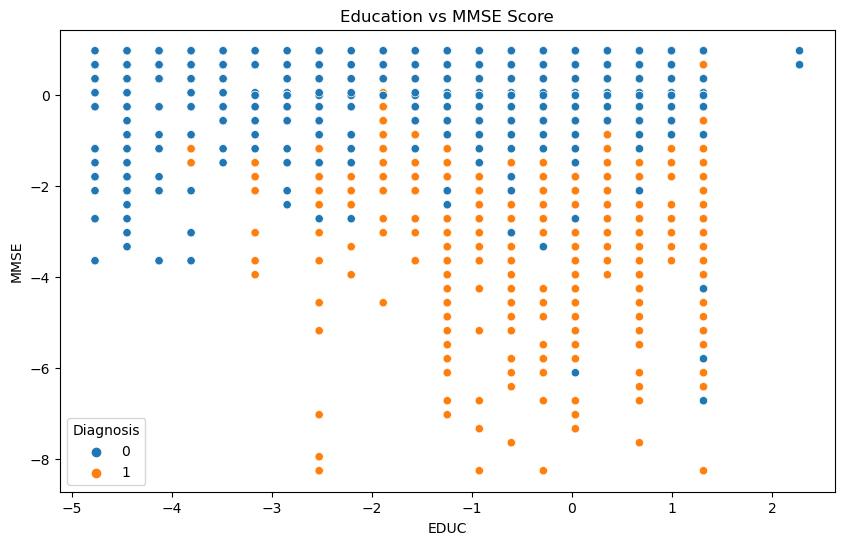

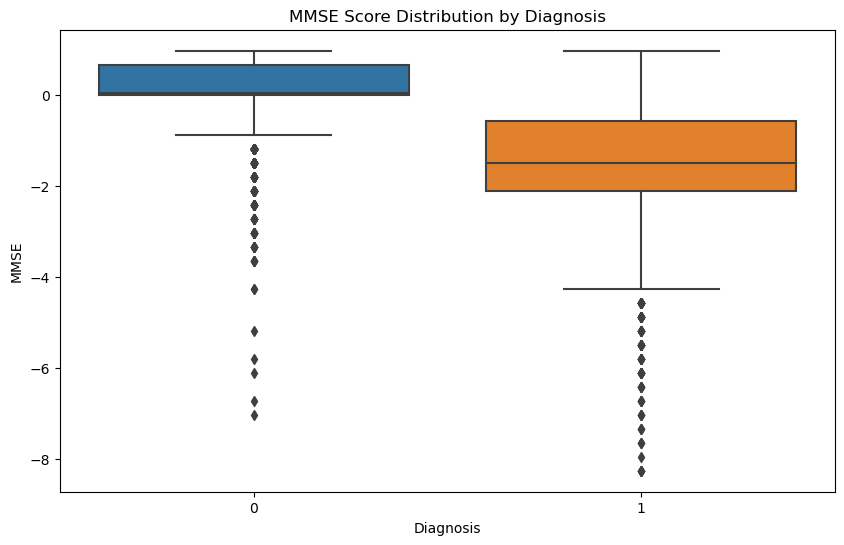

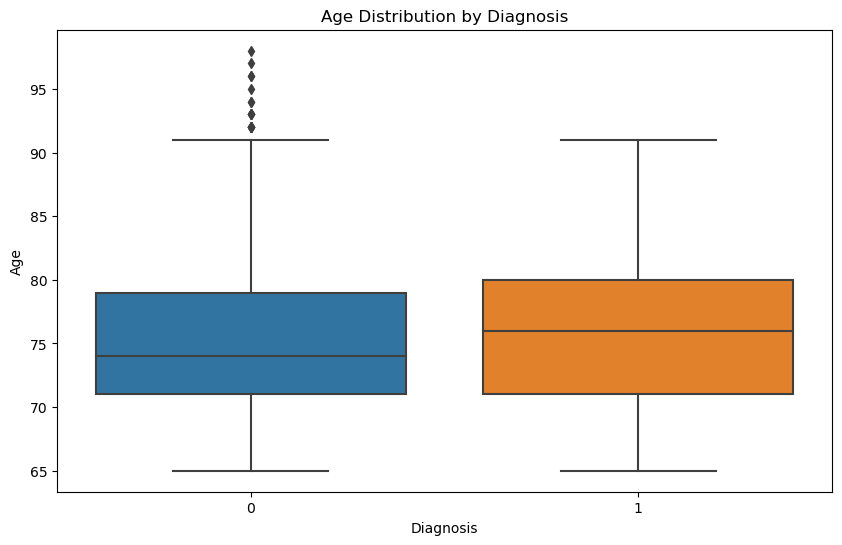

C:\Users\25830651\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


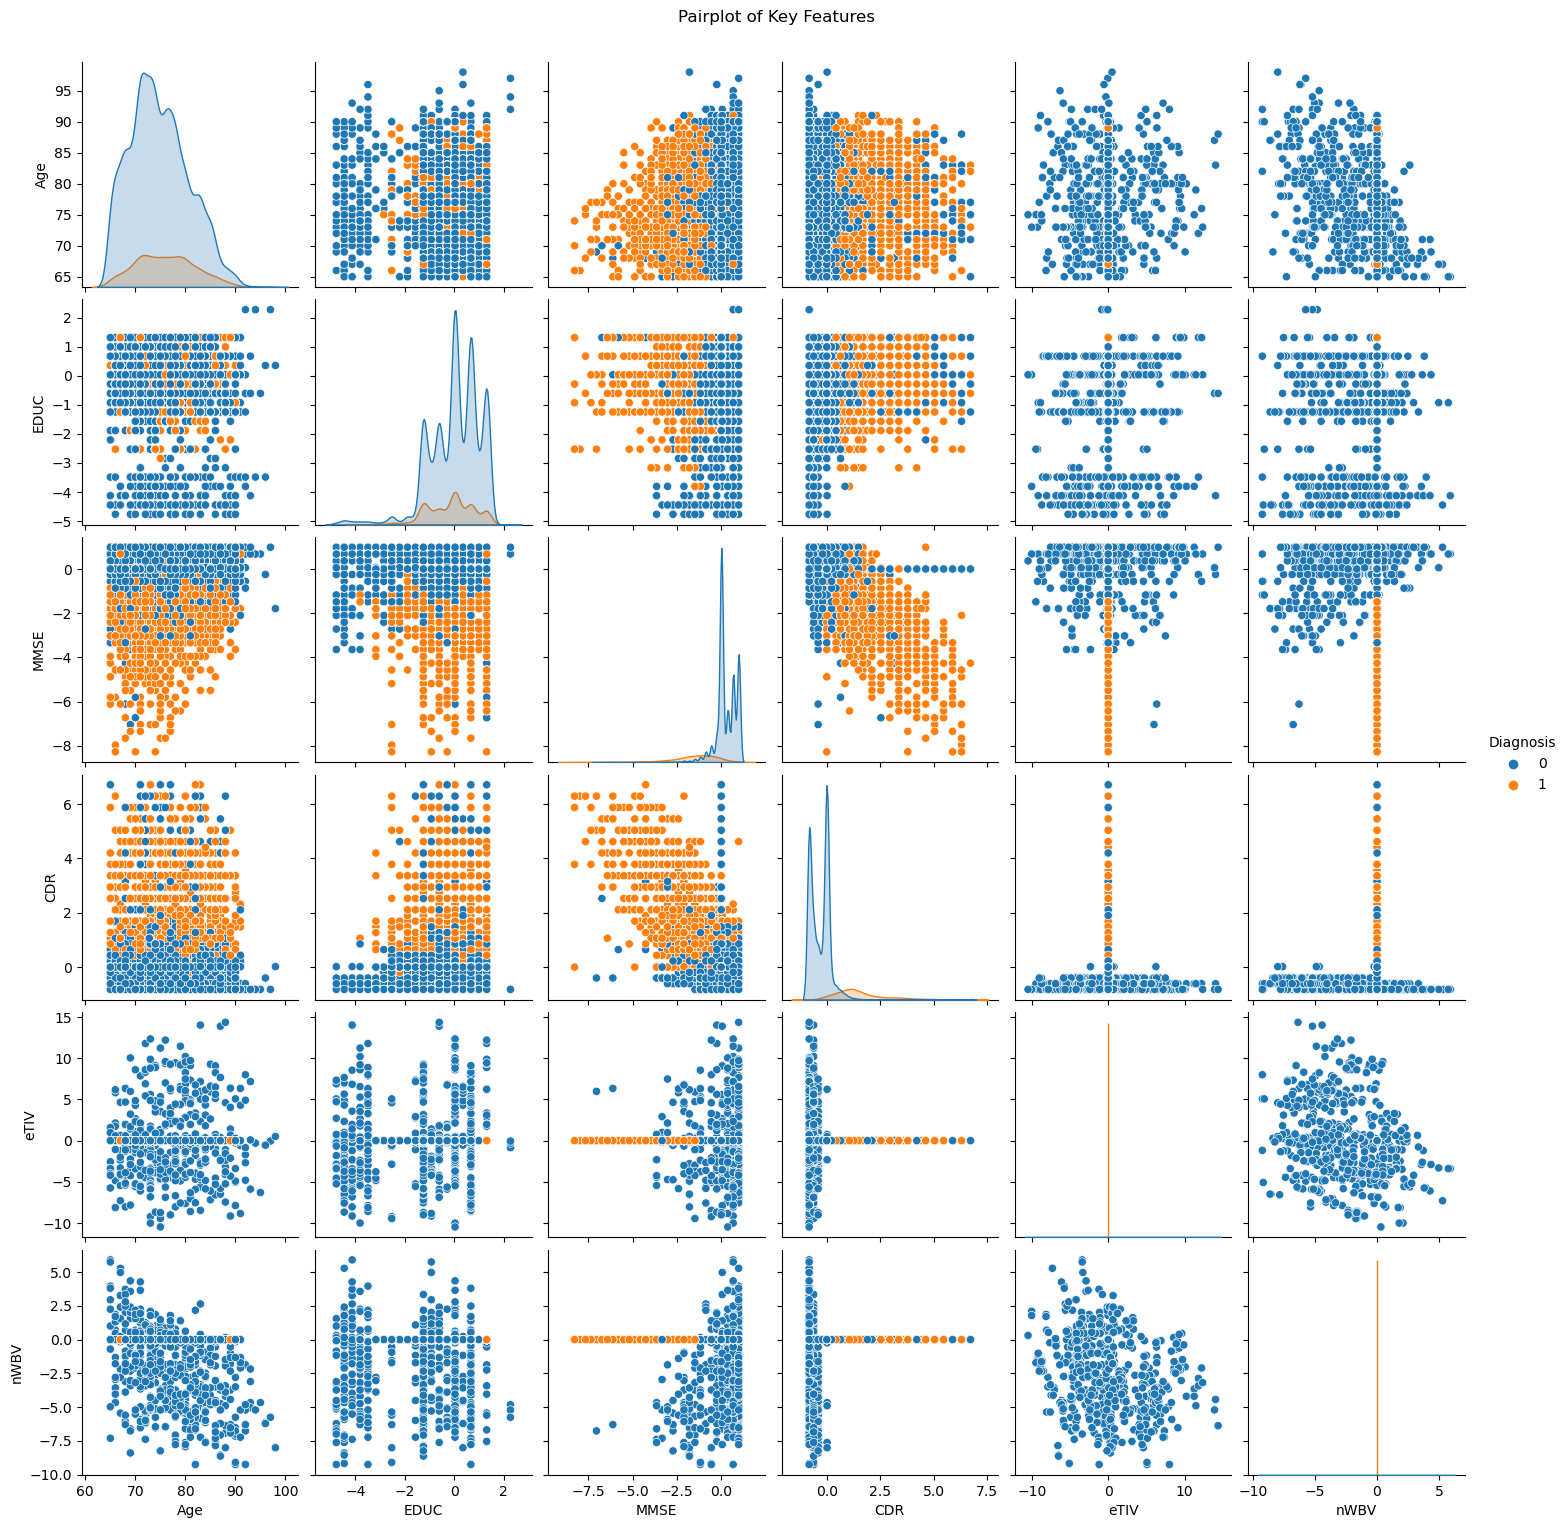


5. Statistical Tests:
T-test for Age between Dementia and Non-Dementia groups:
T-statistic: 9.500193231622566, p-value: 2.403364800868195e-21

Chi-square test for Gender and Diagnosis:
Chi2 statistic: 9.31943245835691, p-value: 0.0022673621303865143


In [12]:
# Exploratory Data Analysis On Age Group 2 (Age Group ≥ 65) After Preprocessing

perform_eda(group2)



--- Results for Age Group 1 (0-64) ---

Training Random Forest for Age Group 1 (0-64)...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       377
           1       0.87      0.82      0.84        49

    accuracy                           0.96       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.96      0.96      0.96       426



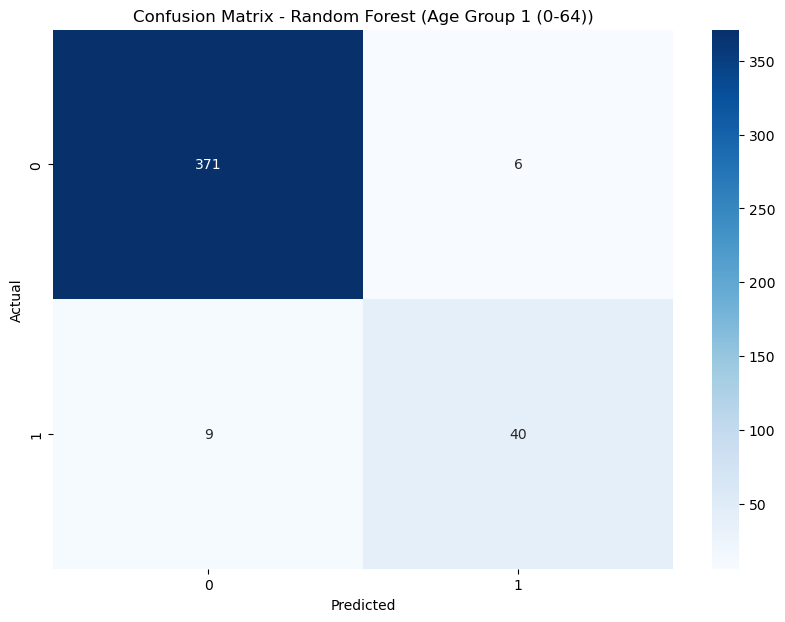


Training SVM for Age Group 1 (0-64)...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       377
           1       0.95      0.80      0.87        49

    accuracy                           0.97       426
   macro avg       0.96      0.90      0.93       426
weighted avg       0.97      0.97      0.97       426



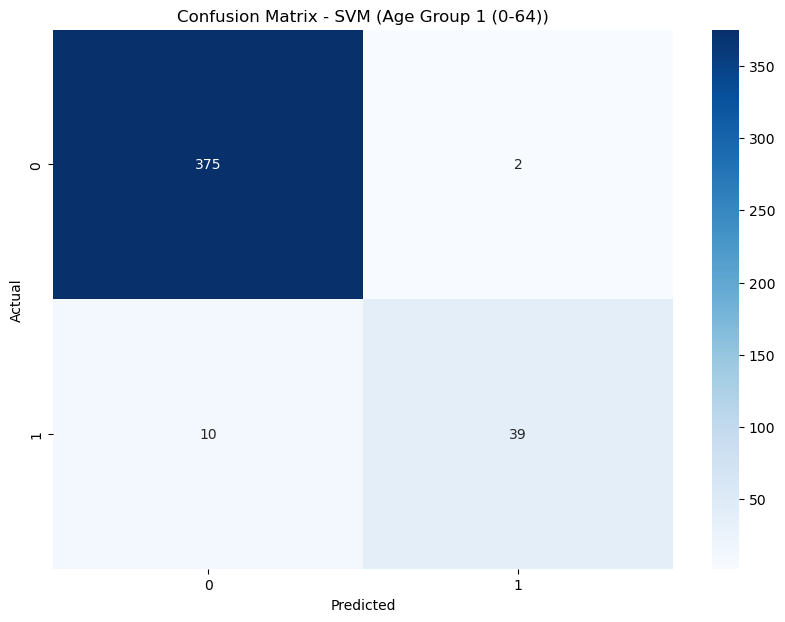


Training Logistic Regression for Age Group 1 (0-64)...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       377
           1       0.86      0.65      0.74        49

    accuracy                           0.95       426
   macro avg       0.91      0.82      0.86       426
weighted avg       0.95      0.95      0.95       426



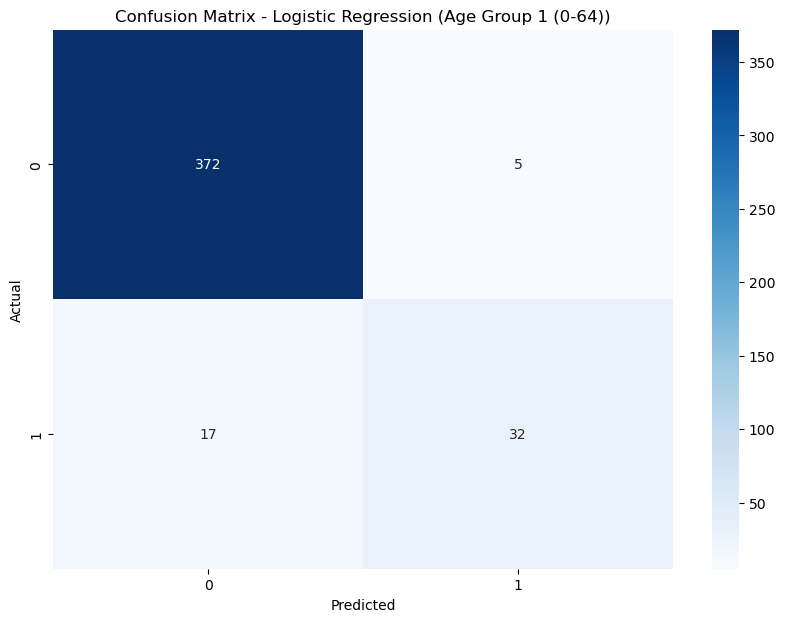


Training Gradient Boosting for Age Group 1 (0-64)...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       377
           1       0.87      0.82      0.84        49

    accuracy                           0.96       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.96      0.96      0.96       426



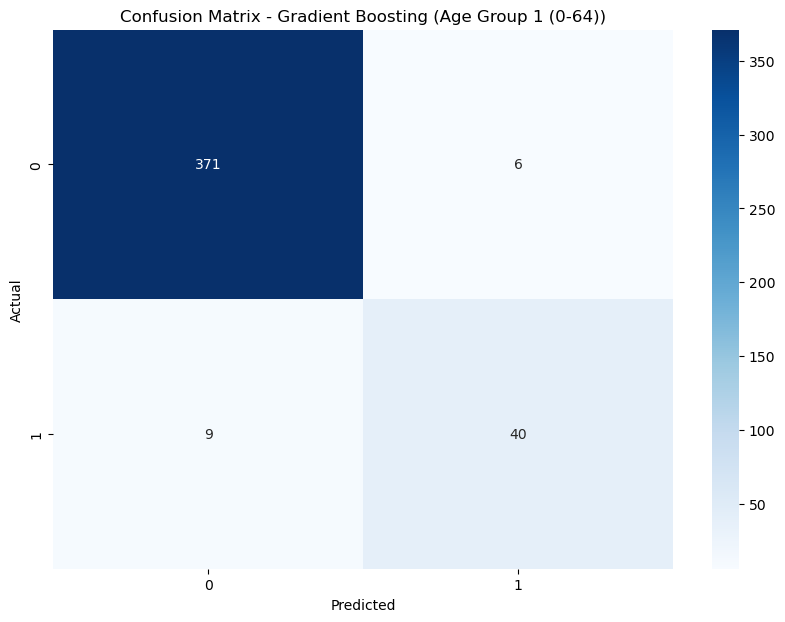


Training Naive Bayes for Age Group 1 (0-64)...
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.24       377
           1       0.13      1.00      0.23        49

    accuracy                           0.23       426
   macro avg       0.57      0.57      0.23       426
weighted avg       0.90      0.23      0.24       426



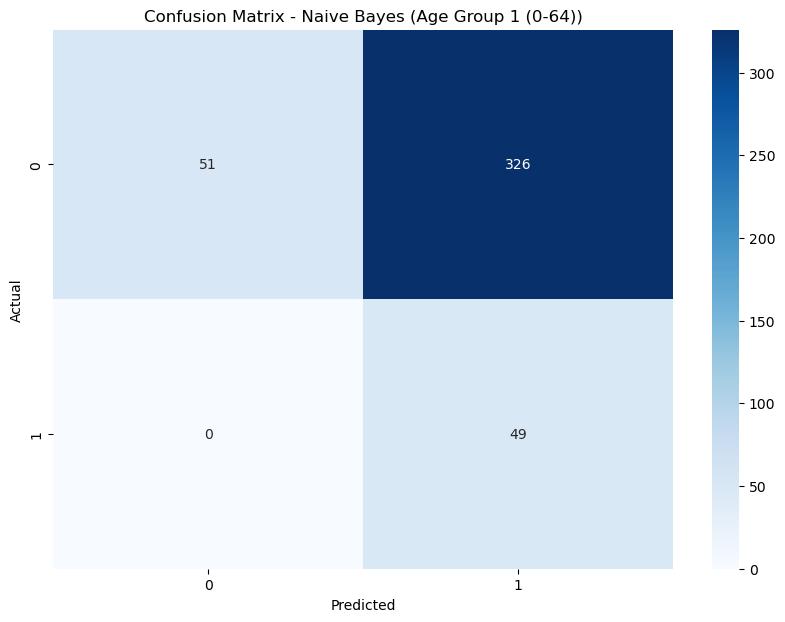


Training Decision Tree for Age Group 1 (0-64)...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       377
           1       0.84      0.78      0.81        49

    accuracy                           0.96       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.96      0.96      0.96       426



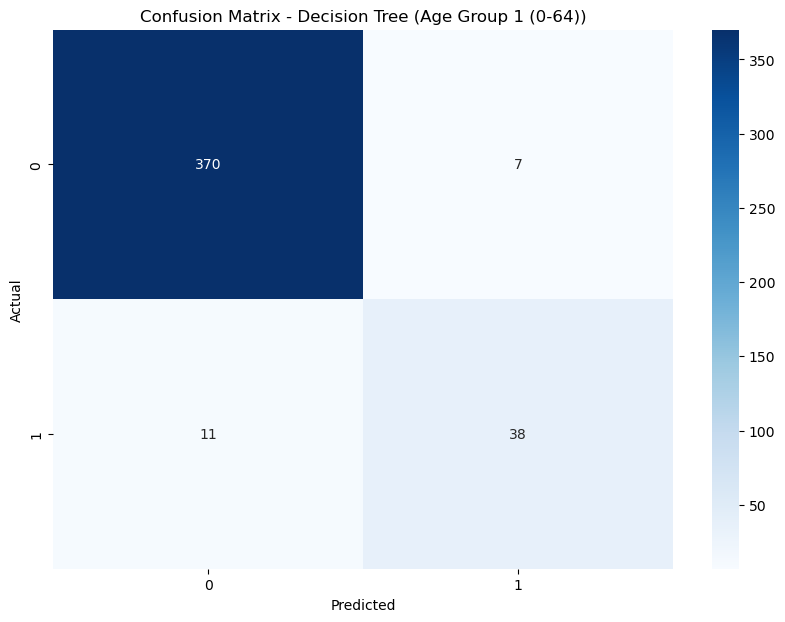


Training MLP for Age Group 1 (0-64)...
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       377
           1       0.89      0.80      0.84        49

    accuracy                           0.96       426
   macro avg       0.93      0.89      0.91       426
weighted avg       0.96      0.96      0.96       426



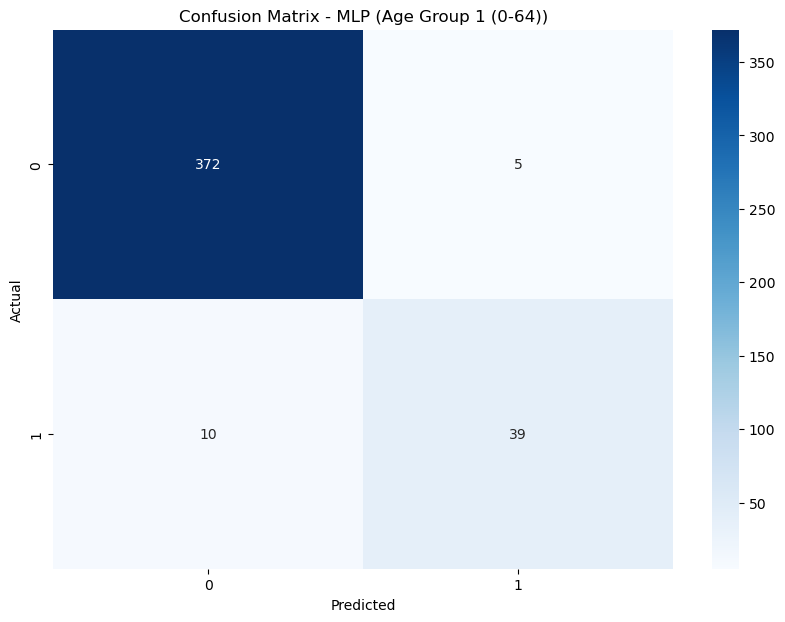



--- Results for Age Group 2 (65+) ---

Training Random Forest for Age Group 2 (65+)...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2601
           1       0.85      0.79      0.82       419

    accuracy                           0.95      3020
   macro avg       0.91      0.89      0.90      3020
weighted avg       0.95      0.95      0.95      3020



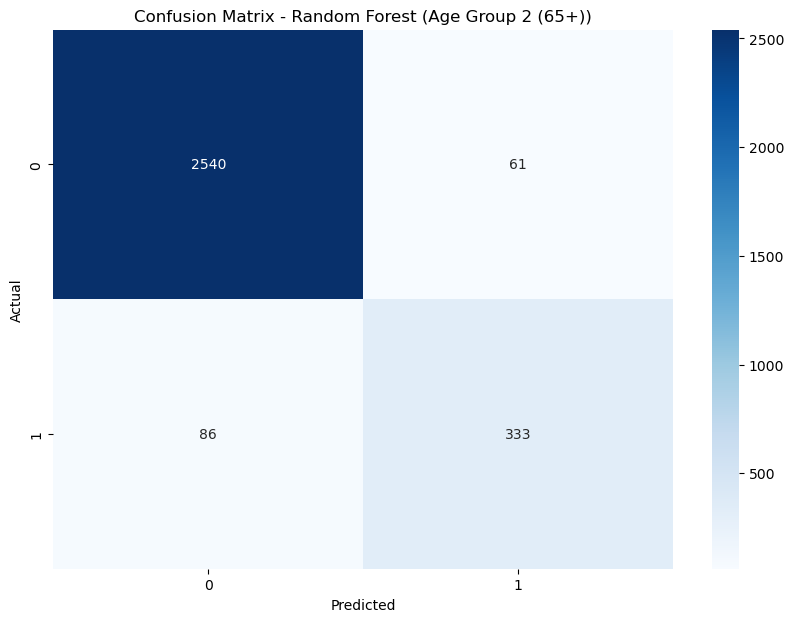


Training SVM for Age Group 2 (65+)...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2601
           1       0.89      0.82      0.85       419

    accuracy                           0.96      3020
   macro avg       0.93      0.90      0.92      3020
weighted avg       0.96      0.96      0.96      3020



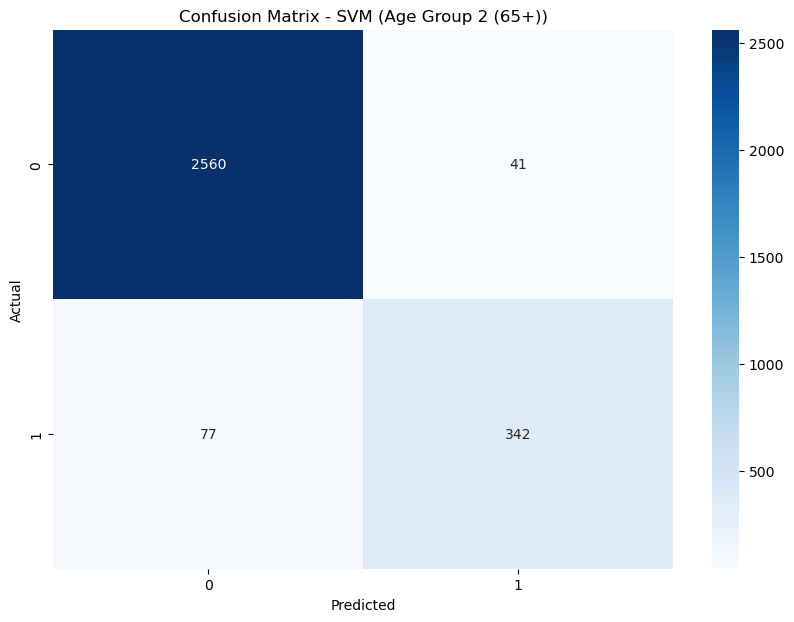


Training Logistic Regression for Age Group 2 (65+)...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2601
           1       0.86      0.69      0.77       419

    accuracy                           0.94      3020
   macro avg       0.91      0.84      0.87      3020
weighted avg       0.94      0.94      0.94      3020



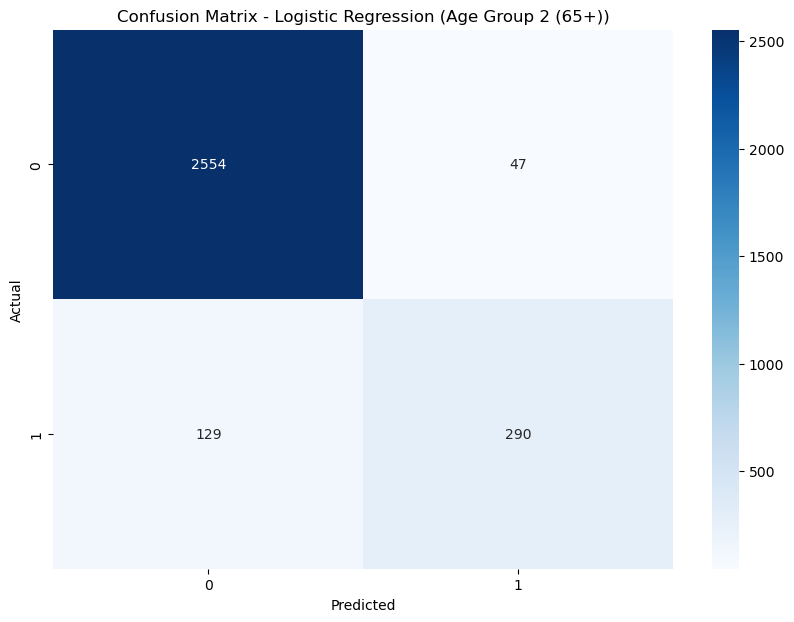


Training Gradient Boosting for Age Group 2 (65+)...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2601
           1       0.87      0.85      0.86       419

    accuracy                           0.96      3020
   macro avg       0.93      0.92      0.92      3020
weighted avg       0.96      0.96      0.96      3020



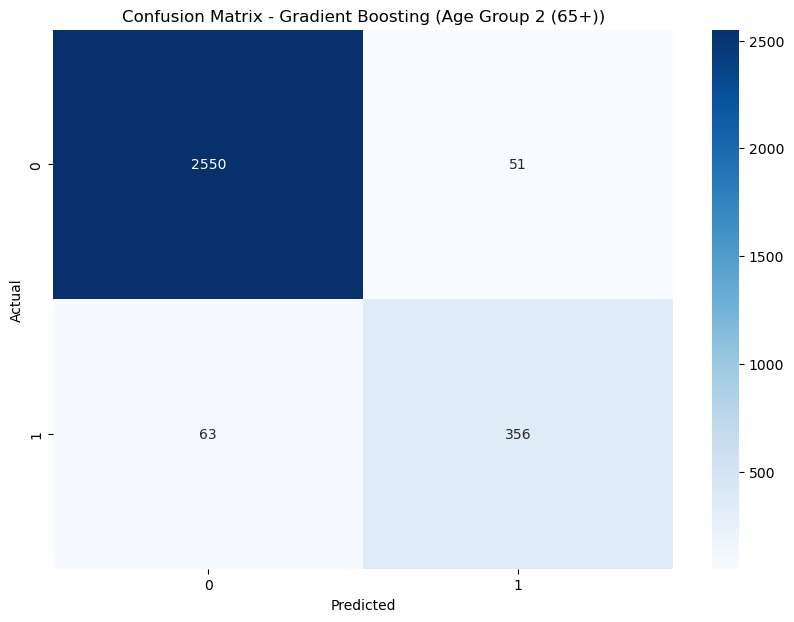


Training Naive Bayes for Age Group 2 (65+)...
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09      2601
           1       0.14      1.00      0.25       419

    accuracy                           0.18      3020
   macro avg       0.57      0.52      0.17      3020
weighted avg       0.88      0.18      0.11      3020



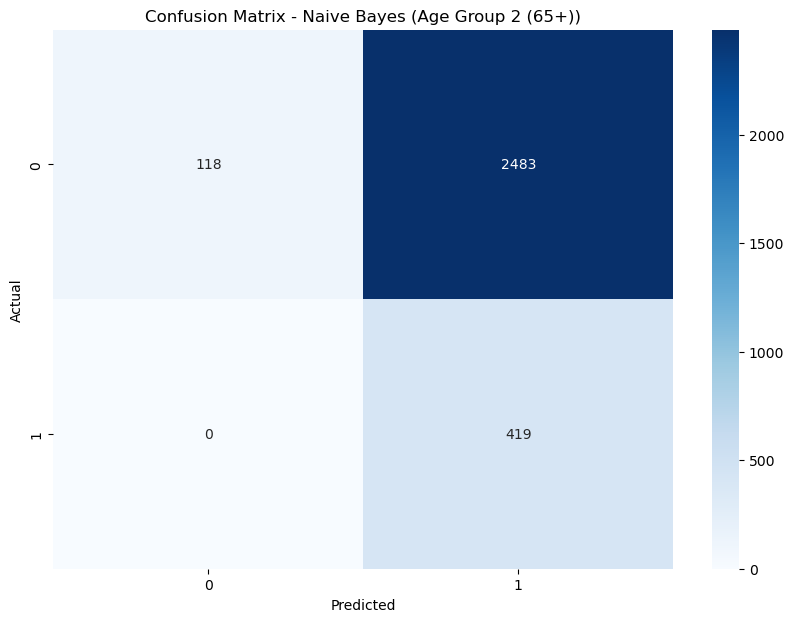


Training Decision Tree for Age Group 2 (65+)...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2601
           1       0.86      0.75      0.80       419

    accuracy                           0.95      3020
   macro avg       0.91      0.87      0.89      3020
weighted avg       0.95      0.95      0.95      3020



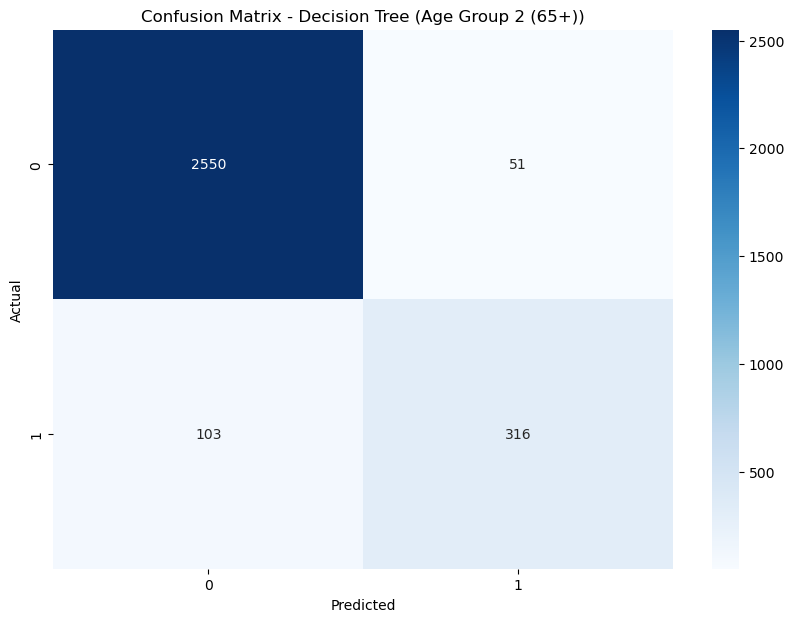


Training MLP for Age Group 2 (65+)...
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2601
           1       0.88      0.85      0.86       419

    accuracy                           0.96      3020
   macro avg       0.93      0.91      0.92      3020
weighted avg       0.96      0.96      0.96      3020



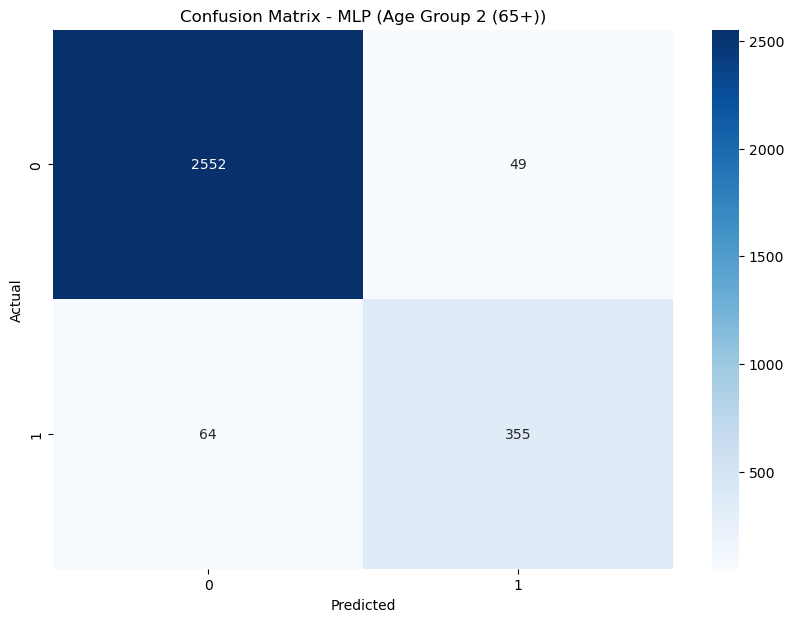

In [6]:
# Function to train and evaluate models
def train_and_evaluate(X, y, group_name):
    if len(X) == 0 or len(y) == 0:
        print(f"No data available for {group_name}")
        return
    if len(y.unique()) < 2:
        print(f"Only one class present in {group_name}. Cannot perform classification.")
        return
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    classifiers = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'MLP': MLPClassifier(random_state=42, max_iter=1000)
    }
    
    for name, clf in classifiers.items():
        print(f"\nTraining {name} for {group_name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name} ({group_name})')
        plt.show()

# Train and evaluate for each age group
for group, name in [(group1, "Age Group 1 (0-64)"), (group2, "Age Group 2 (65+)")]:
    print(f"\n\n--- Results for {name} ---")
    X = group.drop(columns=['ID', 'Diagnosis', 'Age'])
    y = group['Diagnosis']
    train_and_evaluate(X, y, name)